## Section 2. Data Understanding
### 2.1 Dataset Information

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data splitting
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder

# missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# binning
from sklearn.preprocessing import KBinsDiscretizer

# polynomial features
from sklearn.preprocessing import PolynomialFeatures

# column transfornmer
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline # Pipeline jika melakukan balancing data

# imbalanced
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

# cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# modeling base learners
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# modeling -> ensemble various type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# ensemble similar type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Suppress Warning
import warnings
warnings.filterwarnings('ignore')

# Max Column
pd.set_option('display.max_columns', None)

# Save Model
import joblib
import pickle

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay, make_scorer, fbeta_score
from sklearn.model_selection import learning_curve

# Model Interpretation
import shap
import lime

# MSNO
import missingno as msno

# VIF Checker
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add Constant for VIF
import statsmodels.api as sm

from scipy.stats import spearmanr

sns.set_theme()

In [18]:
real_df = pd.read_csv('../Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = real_df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Berikut adalah penjelasan untuk masing-masing kolom:

<table>
    <thead>
        <tr>
            <th>Kolom</th>
            <th>Definisi</th>
            <th>Value dan Penjelasan</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><b>customerID</b></td>
            <td>ID unik untuk setiap pelanggan.</td>
            <td><code>Teks alfanumerik</code>: Kode unik pengenal pelanggan.</td>
        </tr>
        <tr>
            <td><b>gender</b></td>
            <td>Jenis kelamin pelanggan.</td>
            <td><code>Male</code>: Laki-laki.<br><code>Female</code>: Perempuan.</td>
        </tr>
        <tr>
            <td><b>SeniorCitizen</b></td>
            <td>Bagaimanakah pelanggan seorang warga senior.</td>
            <td><code>1</code>: Ya, warga senior.<br><code>0</code>: Bukan warga senior.</td>
        </tr>
        <tr>
            <td><b>Partner</b></td>
            <td>Bagaimanakah pelanggan memiliki pasangan.</td>
            <td><code>Yes</code>: Punya pasangan.<br><code>No</code>: Tidak punya pasangan.</td>
        </tr>
        <tr>
            <td><b>Dependents</b></td>
            <td>Bagaimanakah pelanggan memiliki tanggungan.</td>
            <td><code>Yes</code>: Punya tanggungan.<br><code>No</code>: Tidak punya tanggungan.</td>
        </tr>
        <tr>
            <td><b>tenure</b></td>
            <td>Lama berlangganan dalam bulan.</td>
            <td><code>Numerik</code>: Jumlah bulan pelanggan bersama perusahaan.</td>
        </tr>
        <tr>
            <td><b>Contract</b></td>
            <td>Jenis kontrak berlangganan.</td>
            <td><code>Month-to-month</code>: Kontrak bulanan.<br><code>One year</code>: Kontrak satu tahun.<br><code>Two year</code>: Kontrak dua tahun.</td>
        </tr>
        <tr>
            <td><b>PaperlessBilling</b></td>
            <td>Menggunakan tagihan elektronik.</td>
            <td><code>Yes</code>: Tagihan via email.<br><code>No</code>: Tagihan fisik.</td>
        </tr>
        <tr>
            <td><b>PaymentMethod</b></td>
            <td>Metode pembayaran yang digunakan.</td>
            <td><code>Electronic check</code>: Pembayaran dengan cek elektronik.<br><code>Mailed check</code>: Pembayaran dengan mengirimkan cek fisik.<br><code>Bank transfer (automatic)</code>: Pembayaran melalui transfer bank otomatis.<br><code>Credit card (automatic)</code>: Pembayaran melalui kartu kredit otomatis.</td>
        </tr>
        <tr>
            <td><b>MonthlyCharges</b></td>
            <td>Tagihan setiap bulan.</td>
            <td><code>Numerik Desimal</code>: Total biaya bulanan untuk semua layanan.</td>
        </tr>
        <tr>
            <td><b>TotalCharges</b></td>
            <td>Total tagihan selama berlangganan.</td>
            <td><code>Numerik Desimal</code>: Akumulasi semua tagihan bulanan.</td>
        </tr>
        <tr>
            <td><b>PhoneService</b></td>
            <td>Bagaimanakah pelanggan punya layanan telepon.</td>
            <td><code>Yes</code>: Punya layanan telepon.<br><code>No</code>: Tidak punya.</td>
        </tr>
        <tr>
            <td><b>MultipleLines</b></td>
            <td>Bagaimanakah punya lebih dari satu saluran telepon.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Punya telepon, tapi hanya 1 saluran.<br><code>No phone service</code>: Tidak punya layanan telepon.</td>
        </tr>
        <tr>
            <td><b>InternetService</b></td>
            <td>Tipe layanan internet pelanggan.</td>
            <td><code>DSL</code>: Layanan internet melalui jalur telepon standar.<br><code>Fiber optic</code>: Layanan internet berkecepatan tinggi melalui kabel fiber optik.<br><code>No</code>: Tidak berlangganan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineSecurity</b></td>
            <td>Bagaimanakah punya layanan keamanan online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>OnlineBackup</b></td>
            <td>Bagaimanakah punya layanan backup online.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>DeviceProtection</b></td>
            <td>Bagaimanakah punya proteksi perangkat.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>TechSupport</b></td>
            <td>Bagaimanakah punya dukungan teknis premium.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingTV</b></td>
            <td>Bagaimanakah streaming TV dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>StreamingMovies</b></td>
            <td>Bagaimanakah streaming film dari Telco.</td>
            <td><code>Yes</code>: Ya.<br><code>No</code>: Pelanggan berlangganan internet namun tidak menggunakan layanan ini.<br><code>No internet service</code>: Tidak punya layanan internet.</td>
        </tr>
        <tr>
            <td><b>Churn</b></td>
            <td><b>(Target)</b> Bagaimanakah pelanggan berhenti.</td>
            <td><code>Yes</code>: Pelanggan berhenti berlangganan.<br><code>No</code>: Pelanggan masih aktif.</td>
        </tr>
    </tbody>
</table>

### 2.2 Dataset Filtering

In [19]:
df_month = df[(df['Contract'] == 'Month-to-month') & (df['tenure'] >= 1)]
df_oneyear = df[(df['Contract'] == 'One year') & (df['tenure'] >= 12)]
df_twoyear = df[(df['Contract'] == 'Two year') & (df['tenure'] >= 24)]
df = pd.concat([df_month, df_oneyear, df_twoyear], axis=0).reset_index().drop(columns = 'index')
df.shape

(6799, 21)

Terdapat beberapa kriteria pelanggan yang perlu diperhatikan dalam lingkup penelitian ini, yakni:
- Jika pelanggan memiliki kontrak bulanan, maka tenure harus minimal 1 bulan,
- Jika pelanggan memiliki kontrak 1 tahun, maka tenure harus minimal 12 bulan, dan
- Jika pelanggan memiliki kontrak 2 tahun, maka tenure harus minimal harus 24 bulan.

### 2.3 Missing Values Checking

In [20]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Hasil pemeriksaan nilai hilang menunjukkan bahwa seluruh kolom dalam dataset tidak memiliki missing values, yaitu sejumlah 0 untuk setiap variabel. Hal ini menandakan bahwa data pelanggan sudah lengkap dan tidak memerlukan proses imputasi maupun pembersihan tambahan.

### 2.3 Duplicated Values Checking

In [21]:
df.duplicated().sum()

np.int64(0)

Hasil pemeriksaan duplikasi menunjukkan bahwa tidak terdapat baris yang sama persis (duplikat) dalam dataset, yaitu sejumlah 0 baris duplikat. Hal ini menandakan bahwa setiap entri dalam data bersifat unik, sehingga tidak diperlukan tindakan lebih lanjut terkait duplikasi.

### 2.4 Dataset Restructuring

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6799 non-null   object 
 1   gender            6799 non-null   object 
 2   SeniorCitizen     6799 non-null   int64  
 3   Partner           6799 non-null   object 
 4   Dependents        6799 non-null   object 
 5   tenure            6799 non-null   int64  
 6   PhoneService      6799 non-null   object 
 7   MultipleLines     6799 non-null   object 
 8   InternetService   6799 non-null   object 
 9   OnlineSecurity    6799 non-null   object 
 10  OnlineBackup      6799 non-null   object 
 11  DeviceProtection  6799 non-null   object 
 12  TechSupport       6799 non-null   object 
 13  StreamingTV       6799 non-null   object 
 14  StreamingMovies   6799 non-null   object 
 15  Contract          6799 non-null   object 
 16  PaperlessBilling  6799 non-null   object 


### 2.5 Exploratory Data Analysis (EDA) - Univariat

In [23]:
# Mengubah kolom tertentu menjadi tipe data kategorikal
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
            'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
            'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

num_cols = ['MonthlyCharges', 'TotalCharges']

df[cat_cols] = df[cat_cols].astype('category')
df[num_cols] = df[num_cols].astype('float')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6799 non-null   object  
 1   gender            6799 non-null   category
 2   SeniorCitizen     6799 non-null   category
 3   Partner           6799 non-null   category
 4   Dependents        6799 non-null   category
 5   tenure            6799 non-null   int64   
 6   PhoneService      6799 non-null   category
 7   MultipleLines     6799 non-null   category
 8   InternetService   6799 non-null   category
 9   OnlineSecurity    6799 non-null   category
 10  OnlineBackup      6799 non-null   category
 11  DeviceProtection  6799 non-null   category
 12  TechSupport       6799 non-null   category
 13  StreamingTV       6799 non-null   category
 14  StreamingMovies   6799 non-null   category
 15  Contract          6799 non-null   category
 16  PaperlessBilling  6799 n

In [24]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Helper: ubah CamelCase / PascalCase / snake_case → "Camel Case"
def humanize_label(s):
    s = str(s)
    s = s.replace('_', ' ')
    s = re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', s)
    s = re.sub(r'(?<=[A-Z])(?=[A-Z][a-z])', ' ', s)
    return s.title()

def plot_box_and_hist(df, col, figsize=(15, 5)):
    # Humanize kolom
    title_col = humanize_label(col)

    # Visualisasi
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.suptitle(f'Distribution Of {title_col}', fontsize=16, y=1.02)

    # --- Boxplot ---
    sns.boxplot(data=df, x=col, orient='h', ax=axes[0], color="skyblue")
    axes[0].set_title(f'Boxplot Of {title_col}')

    # --- Histogram ---
    bars = axes[1].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Histogram Of {title_col}')
    axes[1].set_xlabel(title_col)
    axes[1].set_ylabel("Frequency")

    # Tambah anotasi putih di histogram
    counts, bins, patches = bars
    for count, left, right in zip(counts, bins[:-1], bins[1:]):
        if count > 0:
            axes[1].text(
                (left + right) / 2, count,
                f"{int(count)}",
                ha="center", va="bottom",
                fontsize=8, color="white", fontweight="bold"
            )

    plt.tight_layout(rect=[0, 0, 1, 0.9])
    plt.show()

    # Statistik deskriptif + IQR
    stats = df[col].describe()
    q1 = stats['25%']
    q3 = stats['75%']
    iqr = q3 - q1
    stats['IQR'] = iqr

    # Tabel transpos
    stats_df = stats.to_frame(name=title_col).T
    display(stats_df)


Fungsi plot_box_and_hist digunakan untuk menganalisis variabel numerik seperti 'tenure'. Fungsi ini menyajikan dua plot berdampingan: sebuah boxplot untuk melihat ringkasan statistik (median, kuartil, jangkauan) dan sebuah KDE plot untuk melihat bentuk distribusi data. Selain visualisasi, fungsi ini juga menampilkan tabel statistik deskriptif yang mencakup mean, standar deviasi, dan IQR (Interquartile Range) untuk memberikan ringkasan kuantitatif.

In [25]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Helper: ubah CamelCase / PascalCase / snake_case → "Camel Case"
def humanize_label(s):
    s = str(s)
    s = s.replace('_', ' ')
    s = re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', s)
    s = re.sub(r'(?<=[A-Z])(?=[A-Z][a-z])', ' ', s)
    return s.title()

def plot_countplot_with_hue(df, col, figsize=(15, 5), mapping=None):
    # Optional mapping (contoh: {0:"No", 1:"Yes"})
    df_plot = df.copy()
    if mapping:
        df_plot[col] = df_plot[col].map(mapping).fillna(df_plot[col])

    # Hitung Count dan Persentase
    counts = df_plot[col].value_counts()
    percentages = counts / len(df_plot) * 100
    total = len(df_plot)

    # Buat urutan berdasarkan Count tertinggi ke terendah
    ordered_categories = counts.index.tolist()
    df_plot[col] = pd.Categorical(df_plot[col], categories=ordered_categories, ordered=True)

    # Plot
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df_plot, y=col, hue=col)

    title_col = humanize_label(col)
    plt.title(f'Distribution Of {title_col}', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel('')

    # Anotasi count + persentase (warna putih, hanya jika >0)
    for p in ax.patches:
        width = p.get_width()
        y = p.get_y() + p.get_height() / 2
        if width > 0:
            label = f'{int(width)} ({width / total:.1%})'
            ax.text(
                width / 2, y, label,
                va='center', ha='center',
                fontsize=9, color='white', fontweight='bold'
            )

    plt.tight_layout()
    plt.show()

    # Tampilkan tabel count dan persentase (dengan reset index)
    table = pd.DataFrame({
        title_col: counts.index,
        'Count': counts.values,
        'Percentage': percentages.apply(lambda x: f'{x:.1f}%').values
    }).reset_index(drop=True)

    display(table)

Untuk variabel kategorikal, fungsi plot_countplot_with_hue digunakan. Fungsi ini menghitung frekuensi setiap kategori, mengurutkannya dari yang terbesar, lalu menampilkannya dalam bentuk countplot horizontal. Setiap bar pada plot diberi anotasi yang menunjukkan jumlah absolut dan persentase relatifnya, sehingga memberikan gambaran distribusi yang jelas dan informatif.

#### 2.5.1 Bagaimana distribusi tenure ?

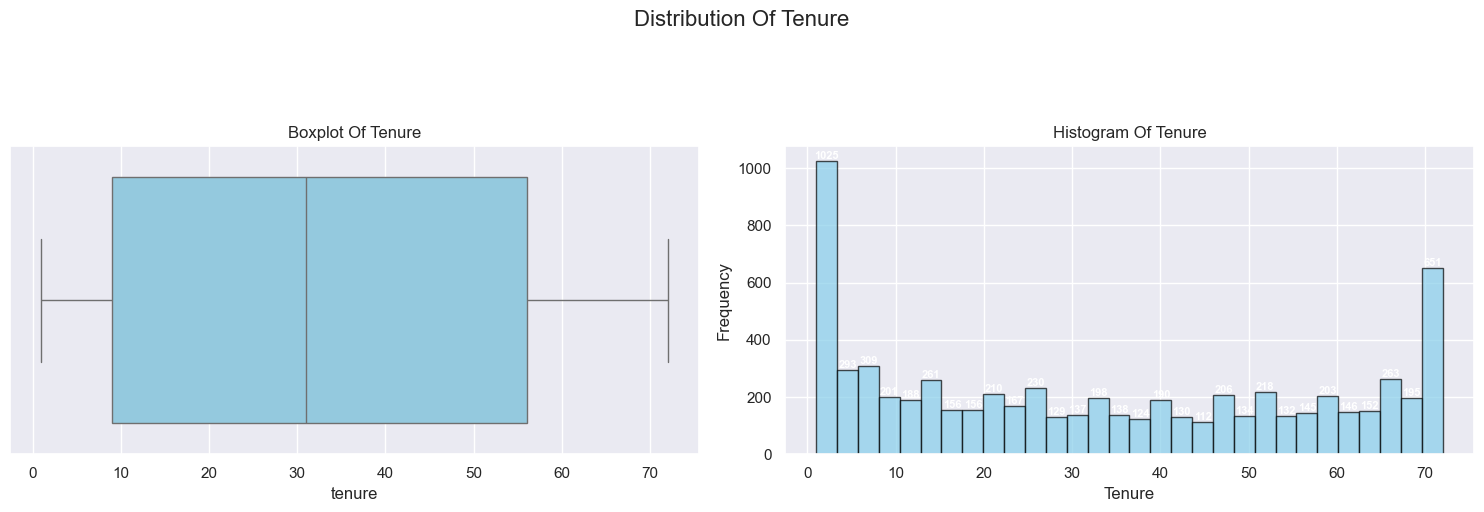

,count,mean,std,min,25%,50%,75%,max,IQR
Tenure,6799.0,33.167819,24.599025,1.0,9.0,31.0,56.0,72.0,47.0


In [26]:
plot_box_and_hist(df, 'tenure')

Distribusi **tenure** pelanggan menunjukkan rata-rata masa berlangganan sekitar **33 bulan** (median **31 bulan**) dengan sebaran antara **1 hingga 72 bulan** dan **IQR 47 bulan**. Boxplot memperlihatkan bahwa sebagian besar pelanggan berada dalam rentang **9 hingga 56 bulan**, sementara distribusi KDE menampilkan dua puncak utama, yaitu pada pelanggan dengan **tenure rendah (awal berlangganan)** dan **tenure tinggi (loyal/lama berlangganan)**. Hal ini mengindikasikan adanya dua segmen dominan: pelanggan baru yang rentan churn lebih awal, serta pelanggan lama yang relatif stabil dan bertahan lebih lama. Perusahaan dapat memanfaatkan temuan ini dengan memberikan perhatian khusus pada fase awal berlangganan untuk mengurangi churn, serta menjaga kepuasan pelanggan lama dengan program loyalitas dan penawaran bernilai tambah.


Revisi: Ubah KDE jadi histogram.

#### 2.5.2 Bagaimana distribusi total charges ?

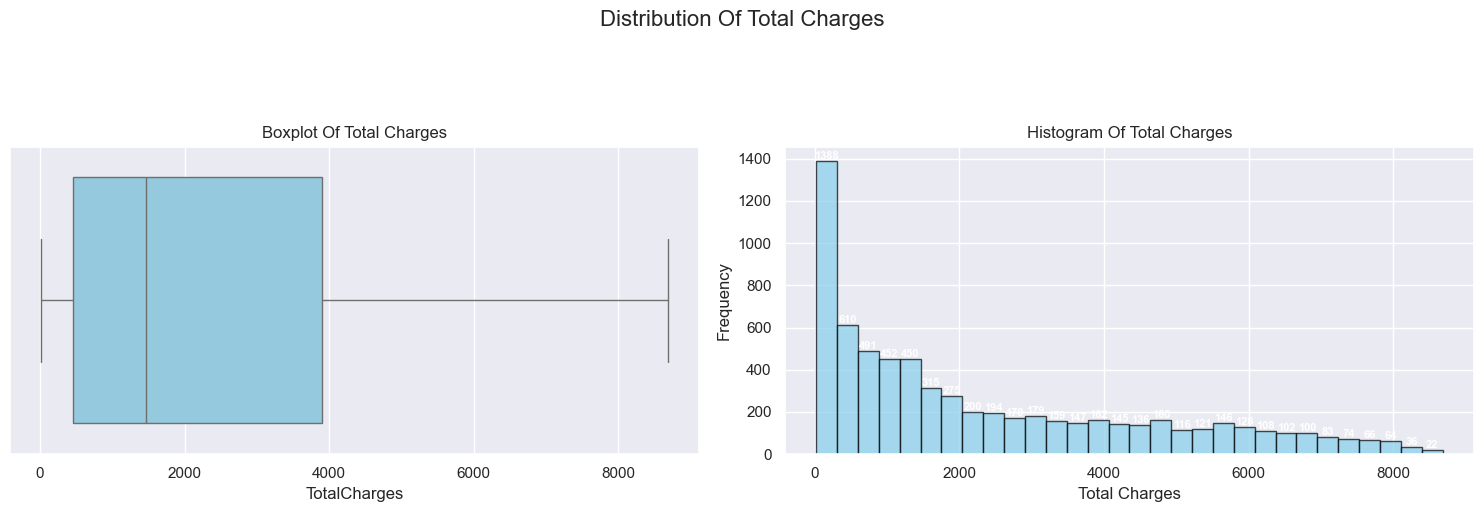

,count,mean,std,min,25%,50%,75%,max,IQR
Total Charges,6799.0,2349.754787,2275.475518,18.85,450.725,1468.9,3901.85,8684.8,3451.125


In [27]:
plot_box_and_hist(df, 'TotalCharges')

Distribusi **TotalCharges** pelanggan menunjukkan rata-rata total pembayaran sekitar **\$2.350** (median **\$1.469**) dengan sebaran antara **\$18,85 hingga \$8.684,8** dan **IQR \$3.451**. Boxplot memperlihatkan banyak variasi dengan beberapa outlier pada nilai yang sangat tinggi, sedangkan plot KDE menampilkan distribusi yang miring ke kanan, artinya sebagian besar pelanggan membayar pada kisaran rendah–menengah, sementara hanya sebagian kecil yang memiliki total pembayaran sangat tinggi. Hal ini konsisten dengan karakteristik pelanggan churn yang umumnya berhenti lebih awal sehingga total pembayarannya rendah, sementara pelanggan loyal cenderung menumpuk biaya lebih besar. Perusahaan dapat memanfaatkan temuan ini dengan memberi perhatian lebih pada pelanggan dengan total pembayaran rendah untuk mencegah churn lebih dini, misalnya melalui program onboarding, insentif loyalitas, atau layanan tambahan yang meningkatkan nilai.


#### 2.5.3 Bagaimana distribusi monthly charges ?

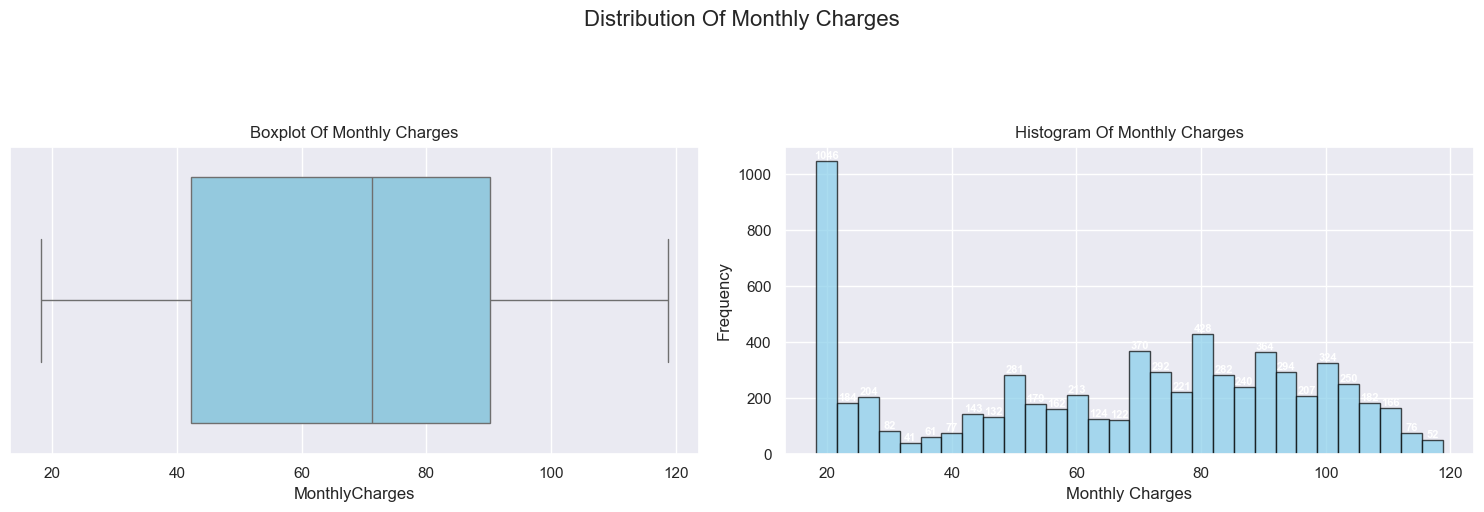

,count,mean,std,min,25%,50%,75%,max,IQR
Monthly Charges,6799.0,65.932762,29.737861,18.25,42.325,71.3,90.25,118.75,47.925


In [28]:
plot_box_and_hist(df, 'MonthlyCharges')

Distribusi **MonthlyCharges** menunjukkan rata-rata biaya bulanan sekitar **\$65,93** (median **\$71,30**) dengan sebaran antara **\$18,25 hingga \$118,75** dan **IQR \$47,93**. Boxplot memperlihatkan variasi yang cukup lebar tanpa outlier ekstrem, sementara distribusi KDE menunjukkan pola multimodal dengan kelompok pelanggan pada biaya rendah (sekitar \$20–\$30), menengah (sekitar \$50–\$70), dan tinggi (sekitar \$80–\$100). Pola ini mengindikasikan adanya segmentasi paket layanan atau pilihan produk yang berbeda. Temuan ini penting karena pelanggan dengan biaya bulanan lebih tinggi cenderung memiliki risiko churn lebih besar. Oleh karena itu, perusahaan dapat menawarkan fleksibilitas paket, diskon, atau benefit tambahan bagi pelanggan di segmen biaya tinggi, sekaligus menjaga kepuasan pelanggan di segmen biaya rendah dan menengah agar tetap loyal.


#### 2.5.4 Bagaimana distribusi churn ?

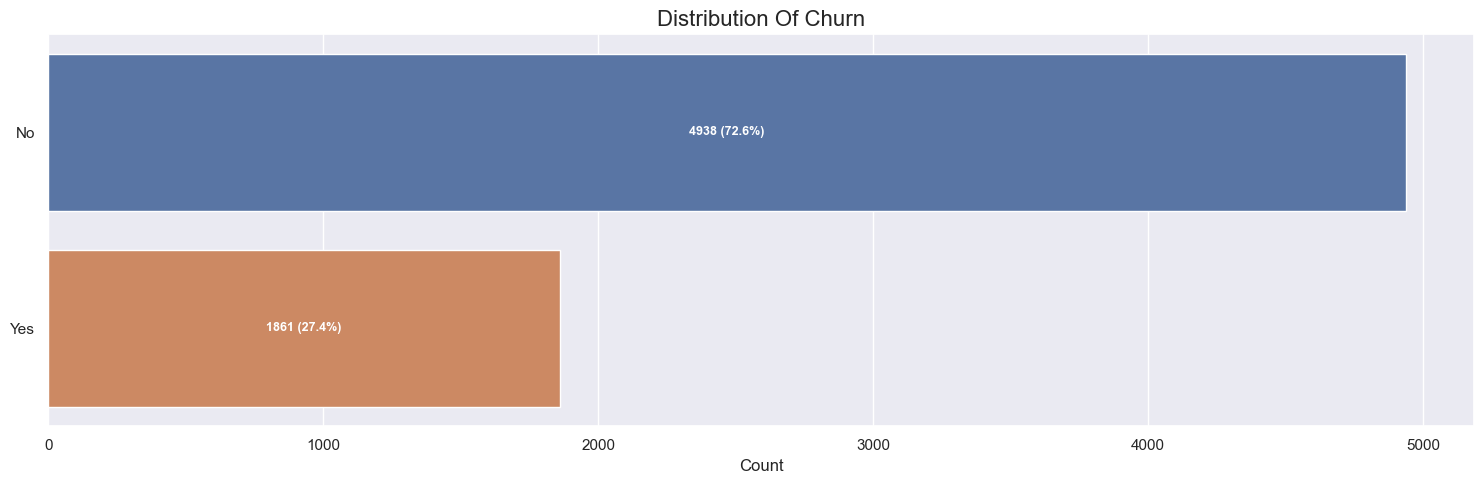

,Churn,Count,Percentage
0,No,4938,72.6%
1,Yes,1861,27.4%


In [29]:
plot_countplot_with_hue(df, 'Churn')

Distribusi **churn** menunjukkan bahwa sebanyak **1.861 pelanggan (27,4%)** berhenti berlangganan (**churn**), sedangkan **4.938 pelanggan (72,6%)** tetap bertahan (**non-churn**). Angka ini menandakan bahwa lebih dari seperempat pelanggan memilih untuk tidak melanjutkan layanan, sebuah proporsi yang cukup signifikan dan dapat berdampak besar terhadap pendapatan perusahaan. Tingginya churn rate menegaskan perlunya strategi retensi yang lebih proaktif, khususnya dengan fokus pada faktor-faktor utama penyebab churn seperti biaya bulanan tinggi, jenis kontrak, serta layanan tambahan. Dengan mengidentifikasi segmen pelanggan yang paling rentan churn dan menawarkan solusi tepat, perusahaan dapat menekan tingkat churn sekaligus meningkatkan loyalitas pelanggan jangka panjang.


#### 2.5.5 Bagaimana karakteristik distribusi pelanggan berdasarkan gender ?

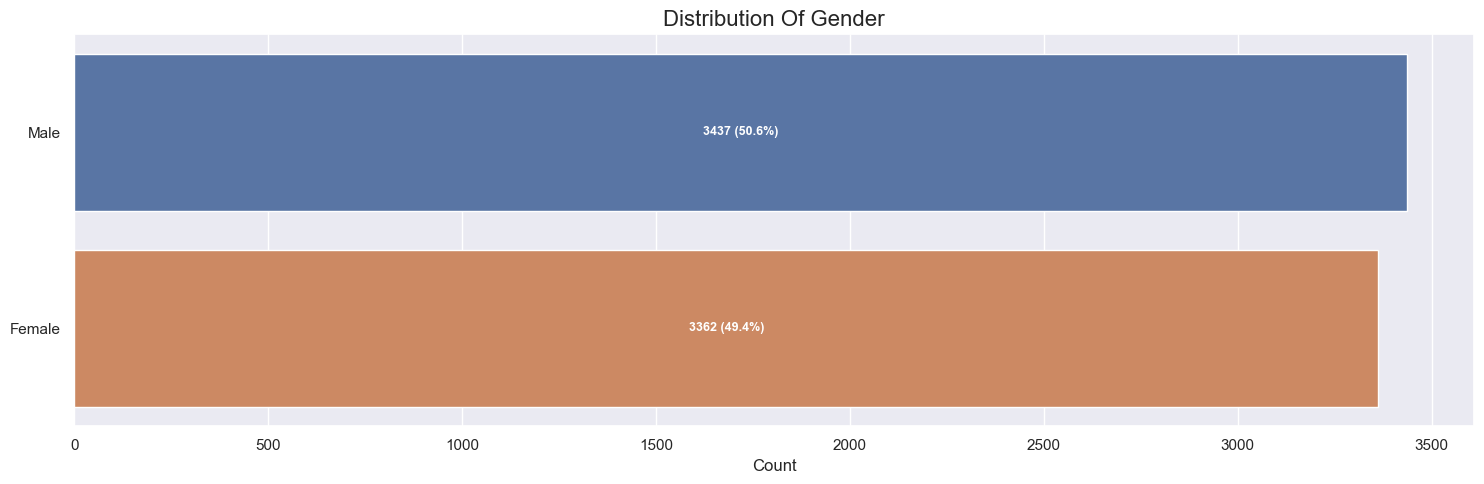

,Gender,Count,Percentage
0,Male,3437,50.6%
1,Female,3362,49.4%


In [30]:
plot_countplot_with_hue(df, 'gender')

Distribusi **gender** pelanggan cukup seimbang, dengan **3.437 laki-laki (50,6%)** dan **3.362 perempuan (49,4%)**. Proporsi yang hampir sama ini menunjukkan bahwa basis pelanggan tidak didominasi oleh satu gender tertentu. Karena distribusi churn pada analisis sebelumnya juga relatif sama antara laki-laki (26,9%) dan perempuan (27,9%), dapat disimpulkan bahwa **gender bukan faktor signifikan yang memengaruhi churn**. Dengan demikian, strategi retensi sebaiknya tidak dibedakan berdasarkan gender, melainkan difokuskan pada faktor lain yang lebih berpengaruh seperti jenis kontrak, biaya bulanan, dan layanan tambahan.


#### 2.5.6 Bagaimana karakteristik distribusi pelanggan berdasarkan senior citizen ?

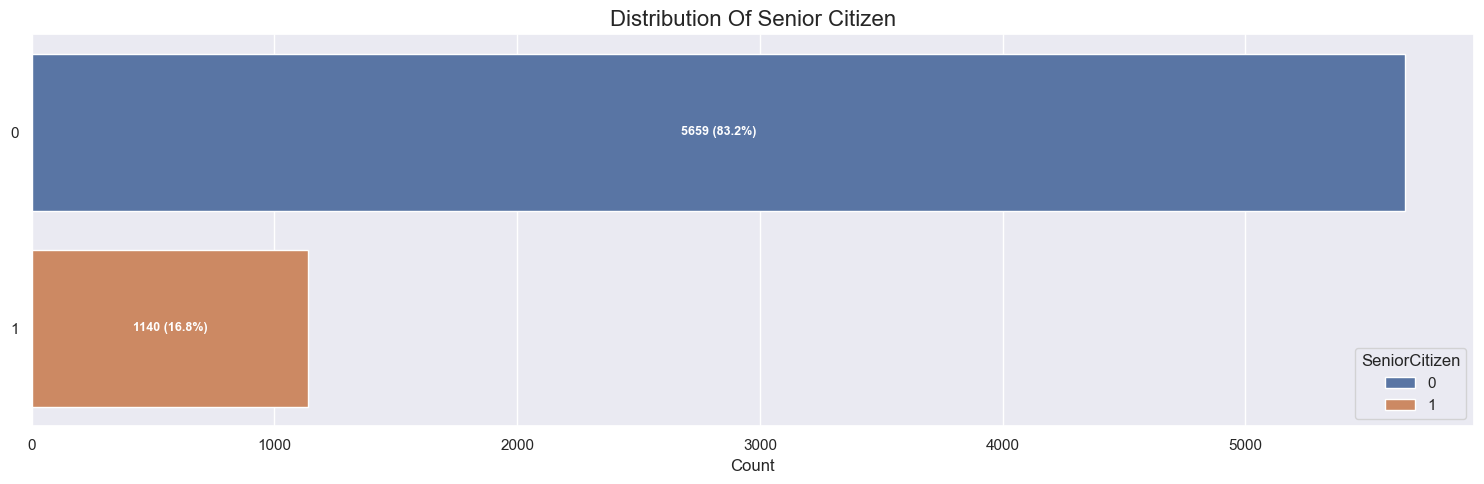

,Senior Citizen,Count,Percentage
0,0,5659,83.2%
1,1,1140,16.8%


In [31]:
plot_countplot_with_hue(df, "SeniorCitizen")

Pelanggan yang bukan lansia berjumlah **5.659 orang (83,2%)**, sedangkan pelanggan lansia hanya **1.140 orang (16,8%)**. Meskipun jumlahnya lebih sedikit, pelanggan lansia memiliki tingkat churn yang jauh lebih tinggi yaitu **41,8%**, dibandingkan dengan pelanggan non-lansia yang hanya **24,5%**. Perbedaan ini menunjukkan bahwa segmen lansia lebih rentan berhenti berlangganan dan membutuhkan perhatian khusus dari perusahaan.

Revisi: Hapus 0.00%. Mapping 0 1 jadi No Yes

#### 2.5.7 Bagaimana karakteristik distribusi pelanggan berdasarkan partner ?

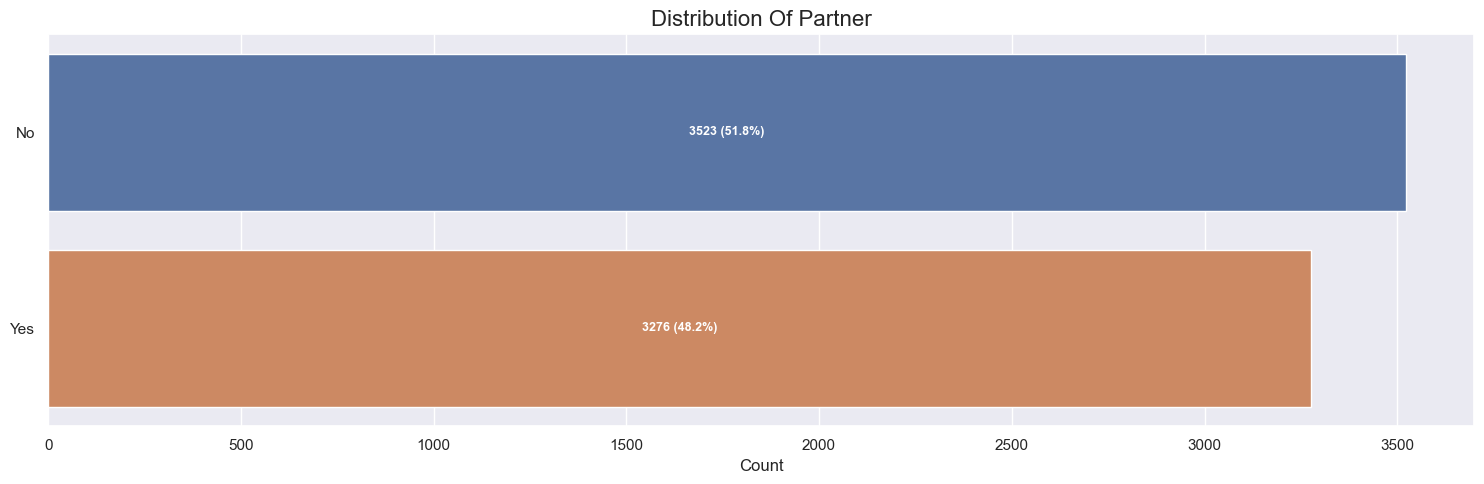

,Partner,Count,Percentage
0,No,3523,51.8%
1,Yes,3276,48.2%


In [32]:
plot_countplot_with_hue(df, 'Partner')

Pelanggan yang tidak memiliki pasangan berjumlah **3.523 orang (51,8%)**, sedangkan pelanggan yang memiliki pasangan berjumlah **3.276 orang (48,2%)**. Tingkat churn pelanggan tanpa pasangan tercatat **33,9%**, lebih tinggi dibandingkan dengan pelanggan yang memiliki pasangan yaitu **20,3%**, sehingga perusahaan sebaiknya memberikan perhatian khusus pada segmen tanpa pasangan melalui penawaran paket hemat, diskon individual, atau program retensi berbasis kebutuhan personal untuk menekan risiko churn.
Lorem ipsum

#### 2.5.8 Bagaimana karakteristik distribusi pelanggan berdasarkan dependents ?

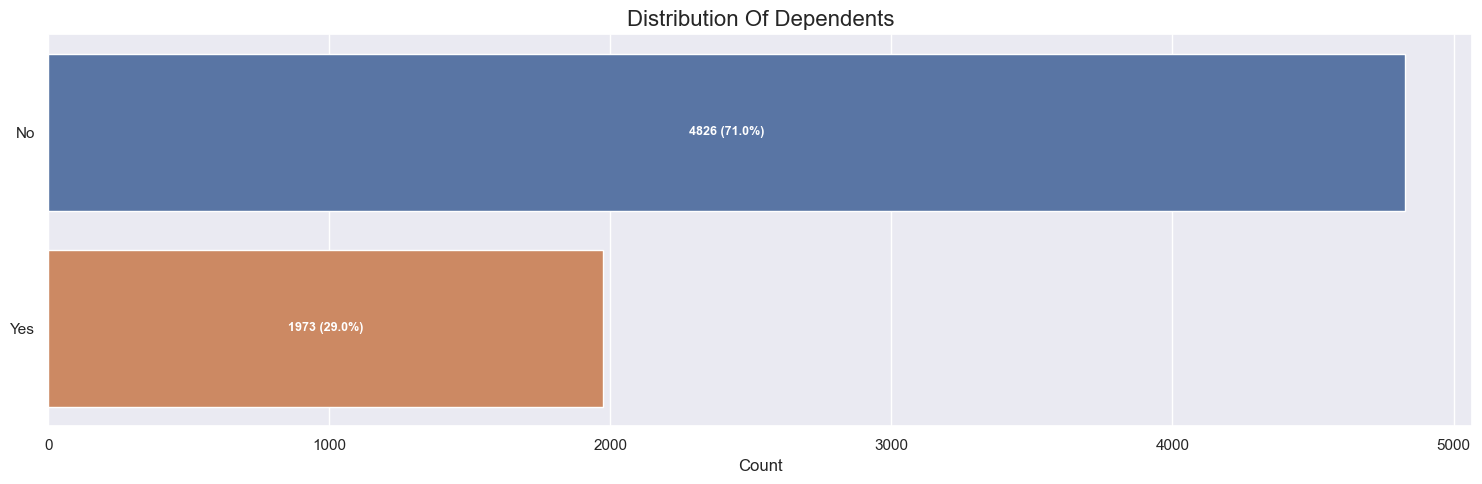

,Dependents,Count,Percentage
0,No,4826,71.0%
1,Yes,1973,29.0%


In [33]:
plot_countplot_with_hue(df, 'Dependents')

Pelanggan yang tidak memiliki tanggungan berjumlah **4.826 orang (71,0%)**, sedangkan pelanggan dengan tanggungan berjumlah **1.973 orang (29,0%)**. Tingkat churn pelanggan tanpa tanggungan tercatat **31,9%**, lebih tinggi dibandingkan pelanggan dengan tanggungan yaitu **16,4%**, sehingga perusahaan dapat memprioritaskan program retensi untuk segmen tanpa tanggungan, misalnya melalui penawaran paket fleksibel, benefit tambahan, atau program loyalitas yang dapat meningkatkan keterikatan agar risiko churn berkurang.


#### 2.5.9 Bagaimana karakteristik distribusi pelanggan berdasarkan phone service ?

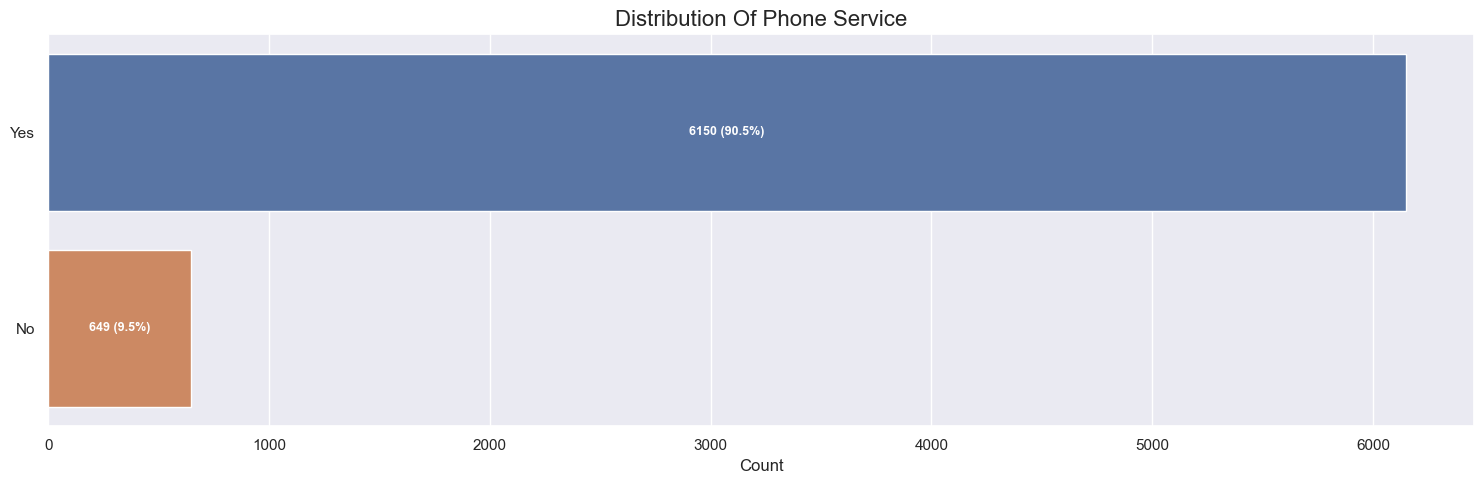

,Phone Service,Count,Percentage
0,Yes,6150,90.5%
1,No,649,9.5%


In [34]:
plot_countplot_with_hue(df, 'PhoneService')

Mayoritas pelanggan menggunakan layanan telepon dengan jumlah **6.150 orang (90,5%)**, sedangkan yang tidak menggunakan hanya **649 orang (9,5%)**. Tingkat churn pelanggan dengan layanan telepon tercatat **27,5%**, sedikit lebih tinggi dibandingkan pelanggan tanpa layanan telepon yaitu **25,9%**, sehingga perusahaan dapat fokus meningkatkan retensi pada pengguna layanan telepon, misalnya dengan memperbaiki kualitas layanan, memberikan paket tambahan bernilai, atau program loyalitas agar pelanggan lebih terikat.


#### 2.5.10 Bagaimana karakteristik distribusi pelanggan berdasarkan multiple lines ?

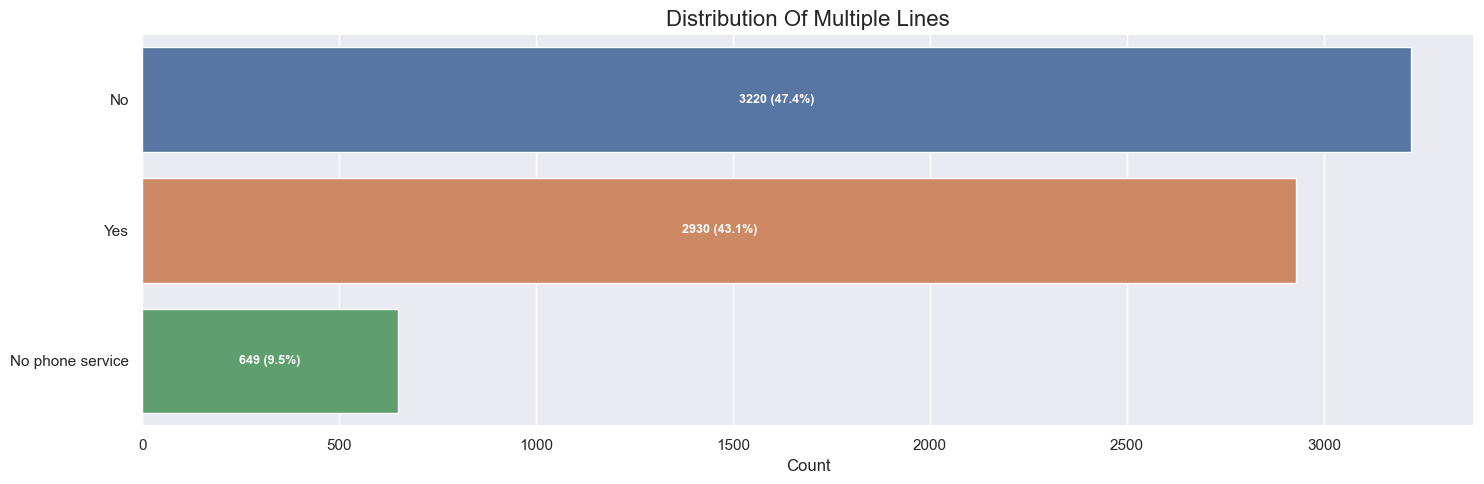

,Multiple Lines,Count,Percentage
0,No,3220,47.4%
1,Yes,2930,43.1%
2,No phone service,649,9.5%


In [35]:
plot_countplot_with_hue(df, 'MultipleLines')

Distribusi pelanggan berdasarkan layanan multiple lines menunjukkan bahwa **3.220 pelanggan (47,4%)** tidak menggunakan layanan ini, **2.930 pelanggan (43,1%)** menggunakannya, dan **649 pelanggan (9,5%)** tidak memiliki layanan telepon sama sekali. Tingkat churn tercatat **29,0%** pada pelanggan dengan multiple lines, sedikit lebih tinggi dibandingkan **26,2%** pada pelanggan tanpa multiple lines dan **25,9%** pada pelanggan tanpa layanan telepon. Hal ini mengindikasikan bahwa pelanggan dengan multiple lines lebih rentan churn, sehingga perusahaan dapat menawarkan paket bundling dengan harga kompetitif atau tambahan benefit eksklusif untuk meningkatkan loyalitas mereka.


#### 2.5.11 Bagaimana karakteristik distribusi pelanggan berdasarkan internet service ?

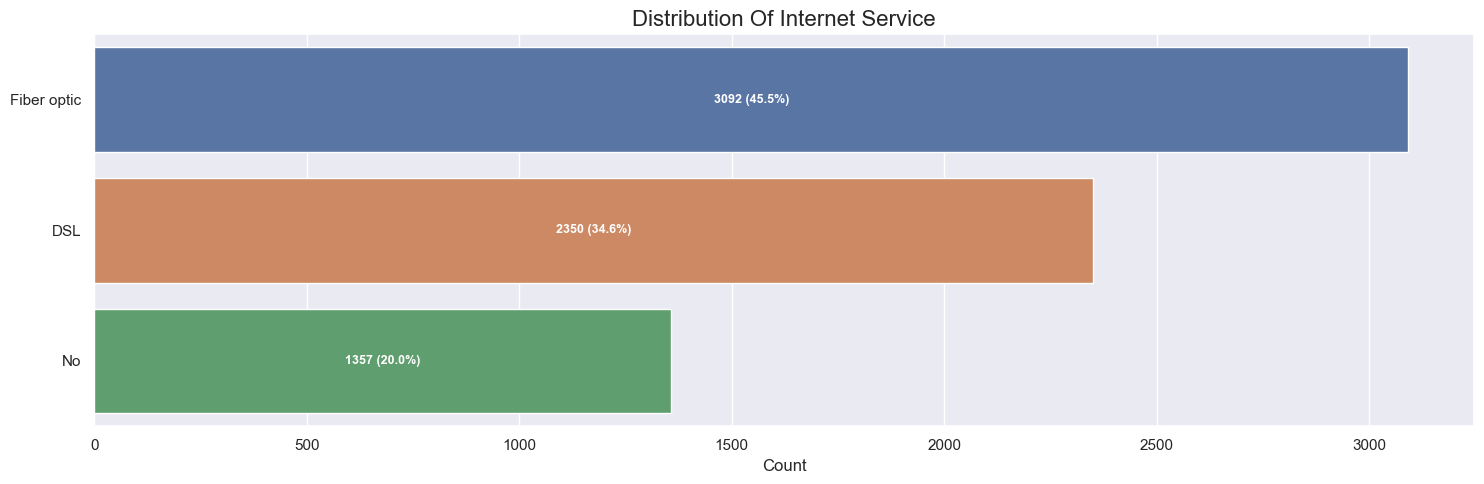

,Internet Service,Count,Percentage
0,Fiber optic,3092,45.5%
1,DSL,2350,34.6%
2,No,1357,20.0%


In [36]:
plot_countplot_with_hue(df, 'InternetService')

Distribusi jenis layanan internet menunjukkan bahwa **3.092 pelanggan (45,5%)** menggunakan fiber optic, **2.350 pelanggan (34,6%)** menggunakan DSL, dan **1.357 pelanggan (20,0%)** tidak memiliki layanan internet. Tingkat churn paling tinggi terdapat pada pelanggan **fiber optic (41,9%)**, jauh lebih tinggi dibandingkan pelanggan **DSL (19,4%)** maupun pelanggan tanpa internet **(8,1%)**. Temuan ini mengindikasikan bahwa pelanggan fiber optic merupakan segmen paling rentan churn, sehingga perusahaan perlu fokus menjaga kepuasan mereka melalui peningkatan kualitas jaringan, paket harga yang lebih fleksibel, atau program loyalitas khusus untuk pengguna internet berkecepatan tinggi.


#### 2.5.12 Bagaimana karakteristik distribusi pelanggan berdasarkan online security ?

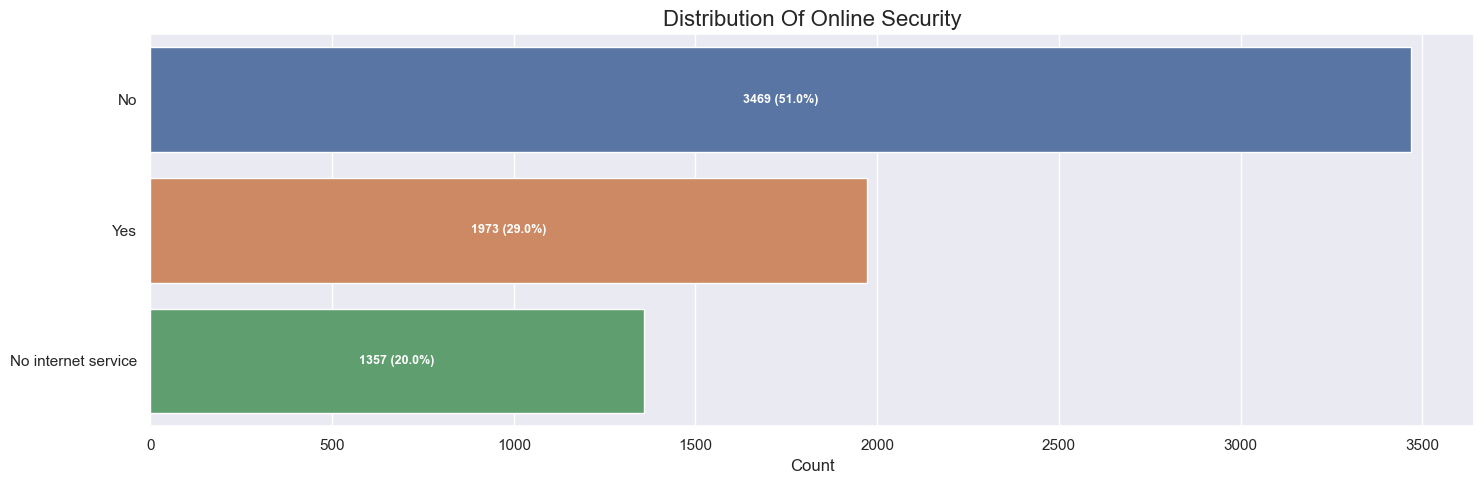

,Online Security,Count,Percentage
0,No,3469,51.0%
1,Yes,1973,29.0%
2,No internet service,1357,20.0%


In [37]:
plot_countplot_with_hue(df, 'OnlineSecurity')

Distribusi layanan keamanan online menunjukkan bahwa **3.469 pelanggan (51,0%)** tidak menggunakan layanan ini, **1.973 pelanggan (29,0%)** menggunakannya, dan **1.357 pelanggan (20,0%)** tidak memiliki layanan internet. Dari sisi churn, pelanggan yang **tidak menggunakan layanan keamanan online memiliki tingkat churn sangat tinggi yaitu 42,0%**, jauh lebih besar dibandingkan pelanggan yang berlangganan layanan ini **(14,9%)** atau yang tidak memiliki internet **(8,1%)**. Hal ini menandakan bahwa keberadaan layanan keamanan online sangat berpengaruh terhadap loyalitas pelanggan. Rekomendasi bisnis yang dapat dilakukan adalah memperluas penawaran paket keamanan online, memberikan promosi bundling dengan layanan internet, serta mengedukasi pelanggan mengenai pentingnya keamanan digital untuk menekan risiko churn.


#### 2.5.13 Bagaimana karakteristik distribusi pelanggan berdasarkan online backup ?

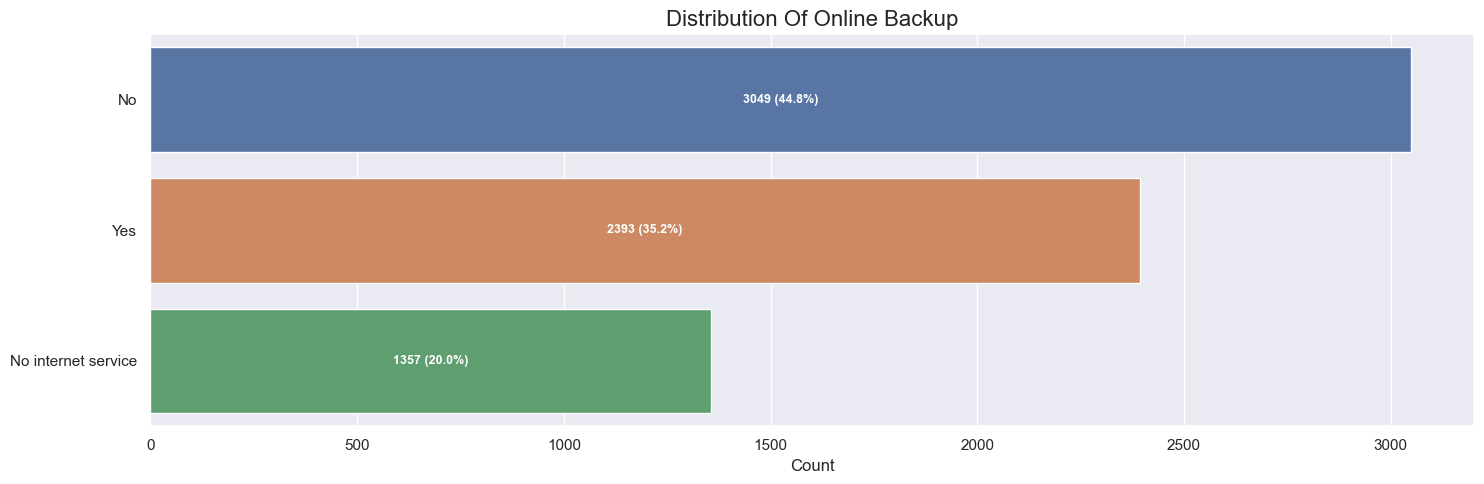

,Online Backup,Count,Percentage
0,No,3049,44.8%
1,Yes,2393,35.2%
2,No internet service,1357,20.0%


In [38]:
plot_countplot_with_hue(df, 'OnlineBackup')

Distribusi layanan cadangan online menunjukkan bahwa **3.049 pelanggan (44,8%)** tidak menggunakan layanan ini, **2.393 pelanggan (35,2%)** menggunakannya, dan **1.357 pelanggan (20,0%)** tidak memiliki layanan internet. Dari sisi churn, pelanggan yang **tidak menggunakan layanan backup online memiliki tingkat churn cukup tinggi yaitu 40,3%**, sedangkan pelanggan yang berlangganan layanan ini memiliki churn yang lebih rendah **(21,8%)**, dan yang tidak memiliki internet hanya **8,1%**. Hal ini memperlihatkan bahwa layanan backup online dapat membantu meningkatkan loyalitas pelanggan. Rekomendasi bisnis yang dapat dilakukan adalah memperluas promosi layanan backup online dengan skema bundling, menawarkan paket tambahan dengan harga terjangkau, serta mengedukasi pelanggan mengenai manfaat keamanan data agar dapat menekan tingkat churn.


#### 2.5.14 Bagaimana karakteristik distribusi pelanggan berdasarkan device protection ?

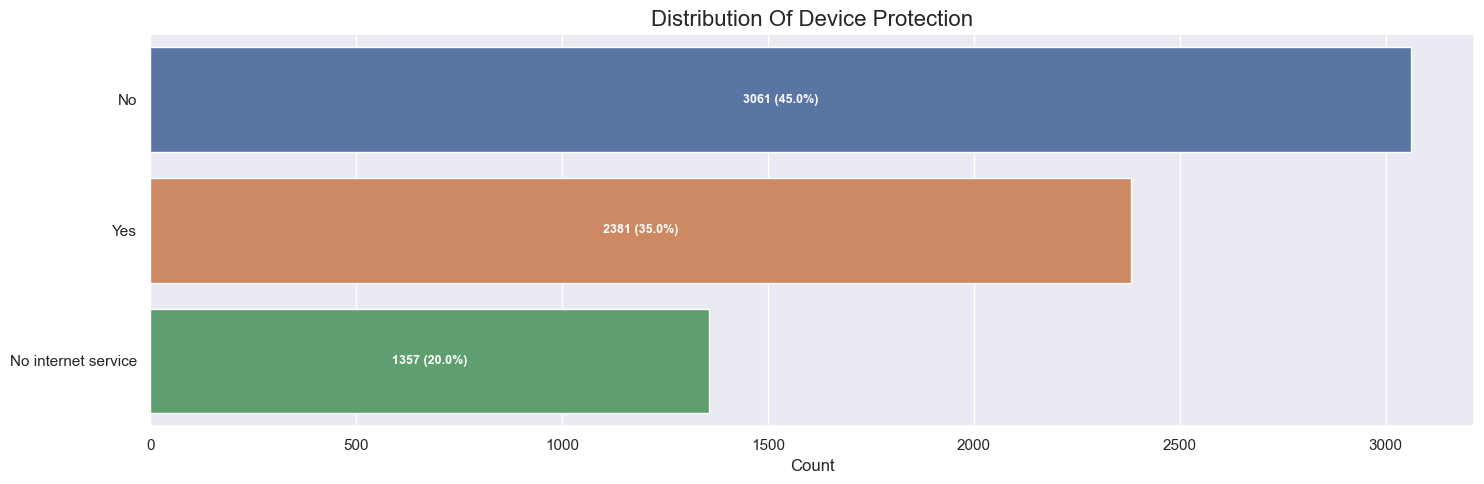

,Device Protection,Count,Percentage
0,No,3061,45.0%
1,Yes,2381,35.0%
2,No internet service,1357,20.0%


In [39]:
plot_countplot_with_hue(df, 'DeviceProtection')

Distribusi layanan perlindungan perangkat menunjukkan bahwa **3.061 pelanggan (45,0%)** tidak menggunakan layanan ini, **2.381 pelanggan (35,0%)** berlangganan layanan, dan **1.357 pelanggan (20,0%)** tidak memiliki layanan internet. Dari sisi churn, pelanggan yang **tidak menggunakan perlindungan perangkat memiliki tingkat churn tinggi sebesar 39,5%**, sedangkan pelanggan yang **berlangganan layanan ini hanya 22,8%**, dan pelanggan tanpa internet hanya **8,1%**. Temuan ini menegaskan bahwa layanan perlindungan perangkat berkontribusi dalam mengurangi churn. Rekomendasi bisnis yang dapat dilakukan adalah memperkuat strategi promosi untuk layanan device protection, misalnya dengan memberikan paket bundling, trial gratis di awal, atau diskon khusus.

#### 2.5.15 Bagaimana karakteristik distribusi pelanggan berdasarkan tech support ?

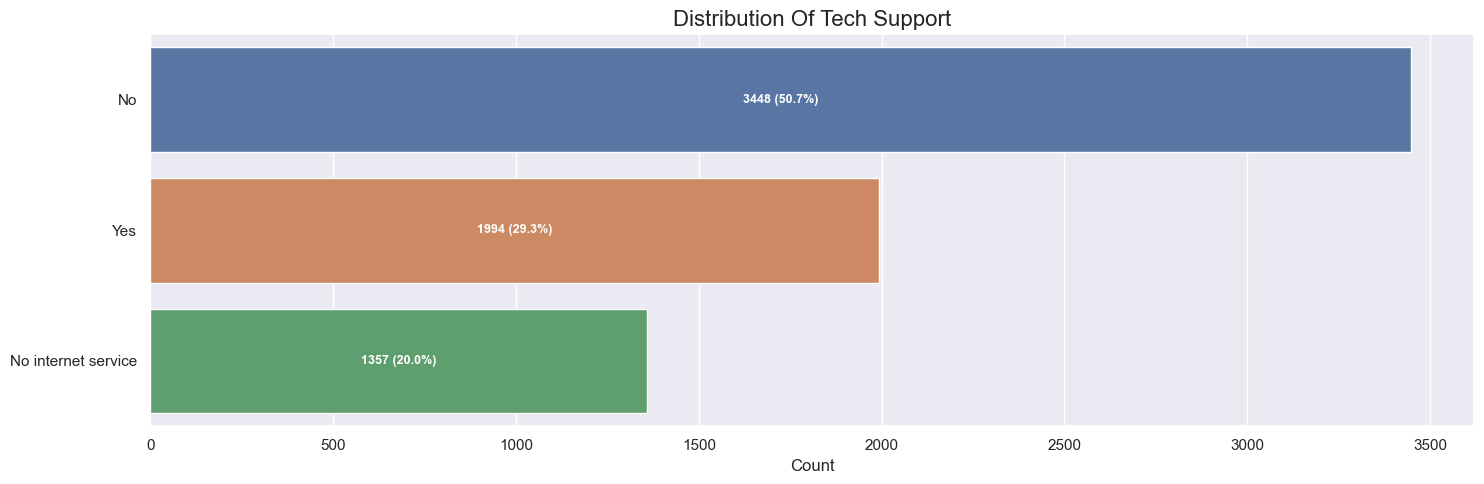

,Tech Support,Count,Percentage
0,No,3448,50.7%
1,Yes,1994,29.3%
2,No internet service,1357,20.0%


In [40]:
plot_countplot_with_hue(df, 'TechSupport')

Distribusi layanan dukungan teknis menunjukkan bahwa **3.448 pelanggan (50,7%)** tidak menggunakan layanan ini, **1.994 pelanggan (29,3%)** berlangganan layanan, dan **1.357 pelanggan (20,0%)** tidak memiliki layanan internet. Dari sisi churn, pelanggan yang **tidak menggunakan tech support memiliki tingkat churn tinggi sebesar 41,8%**, jauh lebih besar dibanding pelanggan yang **berlangganan layanan ini hanya 15,5%**, sementara pelanggan tanpa internet memiliki churn **8,1%**. Temuan ini menegaskan bahwa dukungan teknis berperan penting dalam mengurangi churn. Rekomendasi bisnis yang dapat diterapkan adalah memperluas akses layanan tech support, misalnya dengan paket tambahan gratis untuk pelanggan baru, atau layanan premium dengan biaya terjangkau.

#### 2.5.16 Bagaimana karakteristik distribusi pelanggan berdasarkan streaming TV?

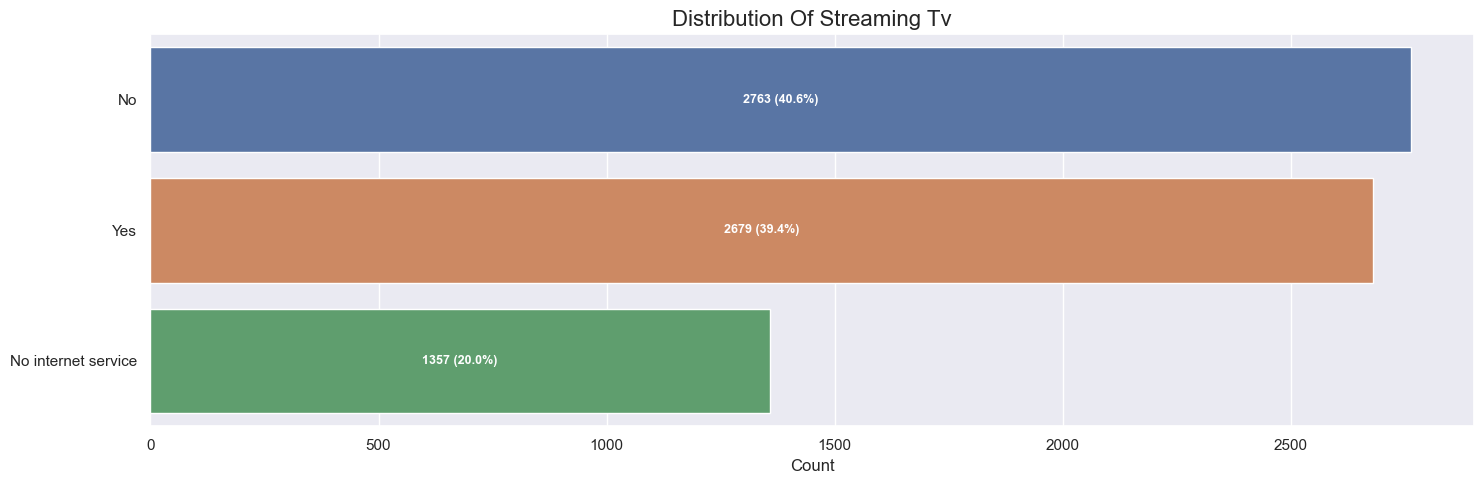

,Streaming Tv,Count,Percentage
0,No,2763,40.6%
1,Yes,2679,39.4%
2,No internet service,1357,20.0%


In [41]:
plot_countplot_with_hue(df, 'StreamingTV')

Distribusi layanan **StreamingTV** menunjukkan bahwa **2.763 pelanggan (40,6%)** tidak menggunakan layanan ini, **2.679 pelanggan (39,4%)** berlangganan layanan, dan **1.357 pelanggan (20,0%)** tidak memiliki layanan internet. Dari sisi churn, pelanggan yang **tidak menggunakan layanan StreamingTV memiliki tingkat churn 34,0%**, sedikit lebih tinggi dibandingkan dengan pelanggan yang **berlangganan layanan StreamingTV sebesar 30,3%**, sementara pelanggan tanpa internet hanya **8,1%**. Hal ini mengindikasikan bahwa keberadaan layanan streaming saja tidak cukup untuk menurunkan churn, bahkan justru pengguna maupun non-pengguna sama-sama memiliki risiko churn yang relatif tinggi. Rekomendasi bisnis yang dapat dilakukan adalah meningkatkan **nilai tambah layanan StreamingTV**, misalnya dengan menghadirkan konten eksklusif, paket bundling internet + streaming dengan harga lebih kompetitif, atau promo loyalitas bagi pelanggan aktif.

#### 2.5.17 Bagaimana karakteristik distribusi pelanggan berdasarkan streaming movies ?

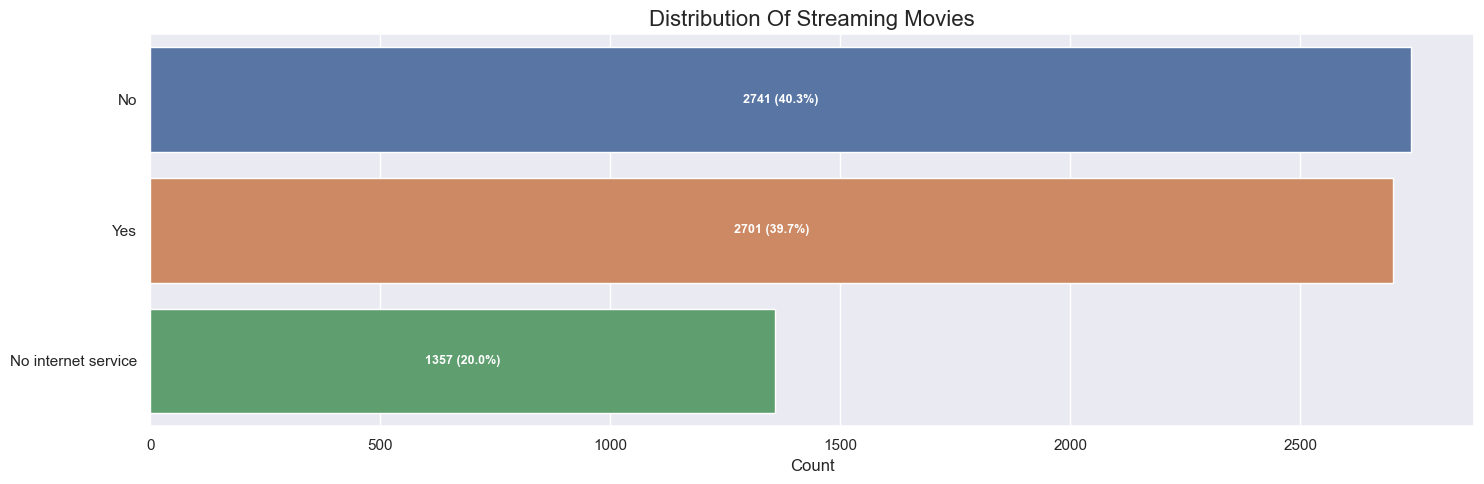

,Streaming Movies,Count,Percentage
0,No,2741,40.3%
1,Yes,2701,39.7%
2,No internet service,1357,20.0%


In [42]:
plot_countplot_with_hue(df, 'StreamingMovies')

Distribusi layanan **StreamingMovies** menunjukkan bahwa **2.741 pelanggan (40,3%)** tidak menggunakan layanan ini, **2.701 pelanggan (39,7%)** berlangganan layanan, dan **1.357 pelanggan (20,0%)** tidak memiliki layanan internet. Dari sisi churn, pelanggan yang **tidak menggunakan layanan StreamingMovies memiliki tingkat churn 34,1%**, sedikit lebih tinggi dibandingkan dengan pelanggan yang **berlangganan layanan StreamingMovies sebesar 30,2%**, sementara pelanggan tanpa internet hanya **8,1%**. Hal ini memperlihatkan bahwa keberadaan layanan film streaming tidak secara signifikan menurunkan risiko churn, karena baik pengguna maupun non-pengguna tetap menunjukkan tingkat churn yang cukup tinggi. Rekomendasi bisnis yang dapat dilakukan adalah memperkuat daya tarik layanan StreamingMovies dengan menghadirkan **konten yang lebih relevan, opsi personalisasi tontonan, serta bundling paket internet + streaming** dengan harga menarik.

#### 2.5.18 Bagaimana karakteristik distribusi pelanggan berdasarkan contract ?


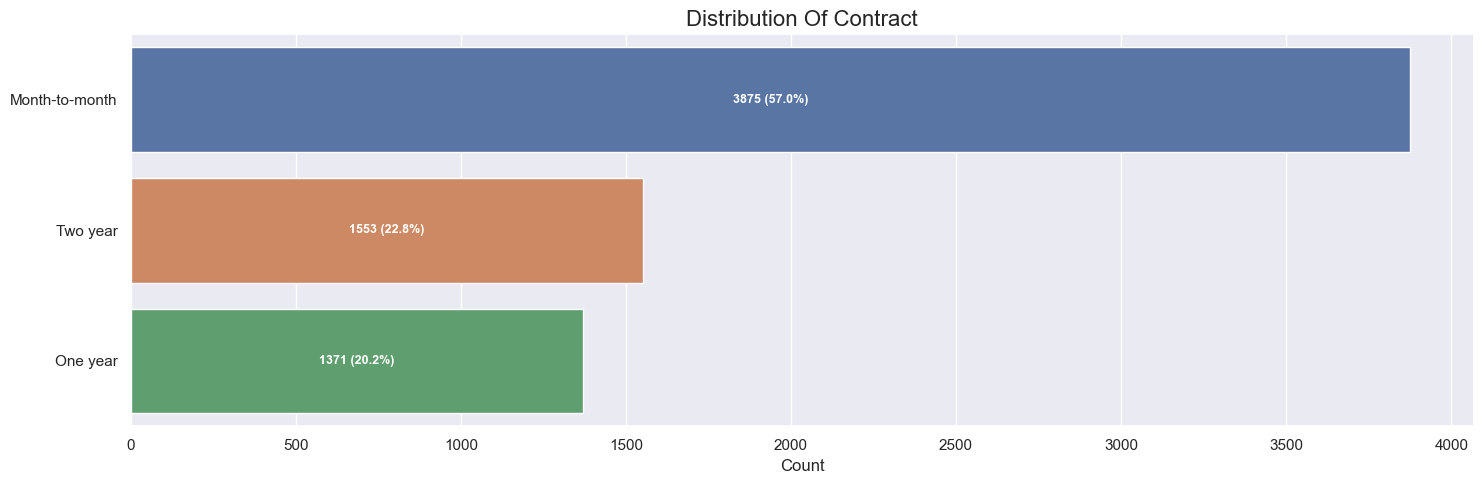

,Contract,Count,Percentage
0,Month-to-month,3875,57.0%
1,Two year,1553,22.8%
2,One year,1371,20.2%


In [43]:
plot_countplot_with_hue(df, 'Contract')

Distribusi jenis kontrak menunjukkan bahwa mayoritas pelanggan menggunakan **kontrak bulanan (Month-to-month) sebanyak 3.875 pelanggan (57,0%)**, diikuti oleh **kontrak dua tahun sebanyak 1.553 pelanggan (22,8%)** dan **kontrak satu tahun sebanyak 1.371 pelanggan (20,2%)**. Dari sisi churn, pelanggan dengan kontrak bulanan memiliki tingkat churn yang jauh lebih tinggi (**42,7%**) dibandingkan dengan kontrak satu tahun (**11,5%**) dan kontrak dua tahun (**3,1%**). Hal ini mengindikasikan bahwa model kontrak jangka panjang berperan penting dalam meningkatkan retensi pelanggan. Rekomendasi bisnis yang dapat dilakukan adalah mendorong lebih banyak pelanggan beralih ke kontrak jangka panjang melalui **diskon harga, bonus layanan tambahan, atau program loyalitas khusus** sehingga pelanggan lebih terikat dan potensi churn dapat ditekan secara signifikan.


#### 2.5.19 Bagaimana karakteristik distribusi pelanggan berdasarkan paperless billing ?

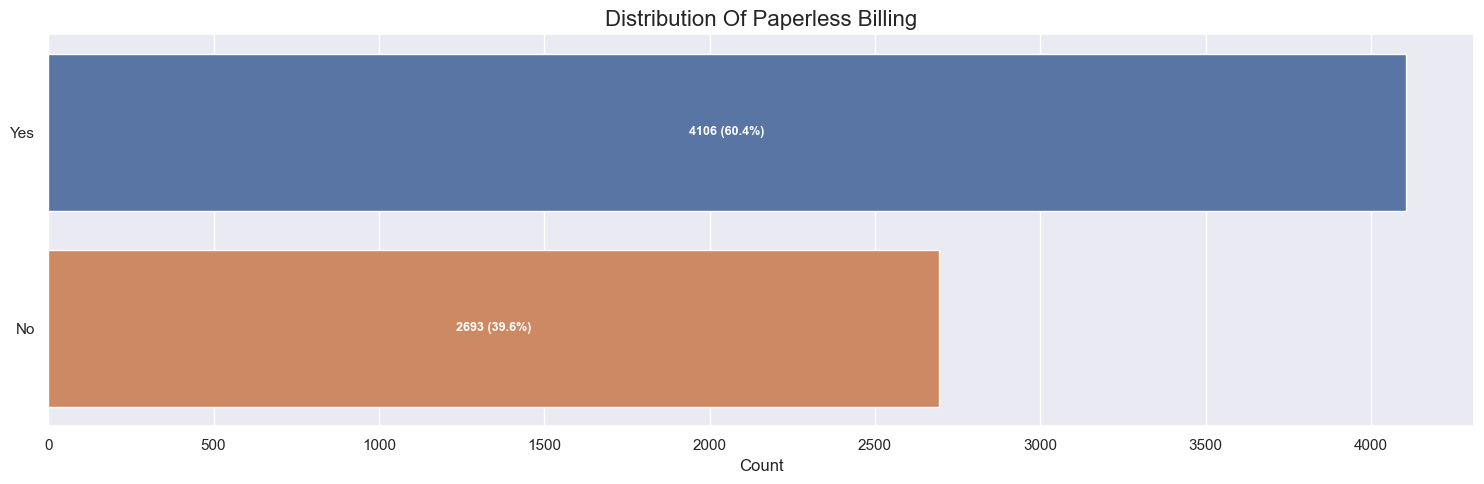

,Paperless Billing,Count,Percentage
0,Yes,4106,60.4%
1,No,2693,39.6%


In [44]:
plot_countplot_with_hue(df, 'PaperlessBilling')

Distribusi metode pembayaran menunjukkan bahwa mayoritas pelanggan menggunakan **paperless billing (faktur elektronik)** sebanyak 4.106 pelanggan (60,4%), sedangkan sisanya **2.693 pelanggan (39,6%)** masih menggunakan metode pembayaran konvensional. Dari sisi churn, pelanggan dengan paperless billing memiliki tingkat churn lebih tinggi (**34,0%**) dibandingkan dengan pelanggan yang masih menggunakan metode konvensional (**17,3%**). Hal ini menandakan bahwa meskipun paperless billing lebih efisien, pelanggan yang menggunakannya cenderung lebih mudah berpindah layanan karena faktor kenyamanan akses atau fleksibilitas. Rekomendasi bisnis yang dapat dilakukan adalah memberikan **insentif tambahan bagi pelanggan paperless billing**, seperti diskon kecil untuk pembayaran tepat waktu atau integrasi dengan program loyalitas digital.


#### 2.5.20 Bagaimana karakteristik distribusi pelanggan berdasarkan payment method?


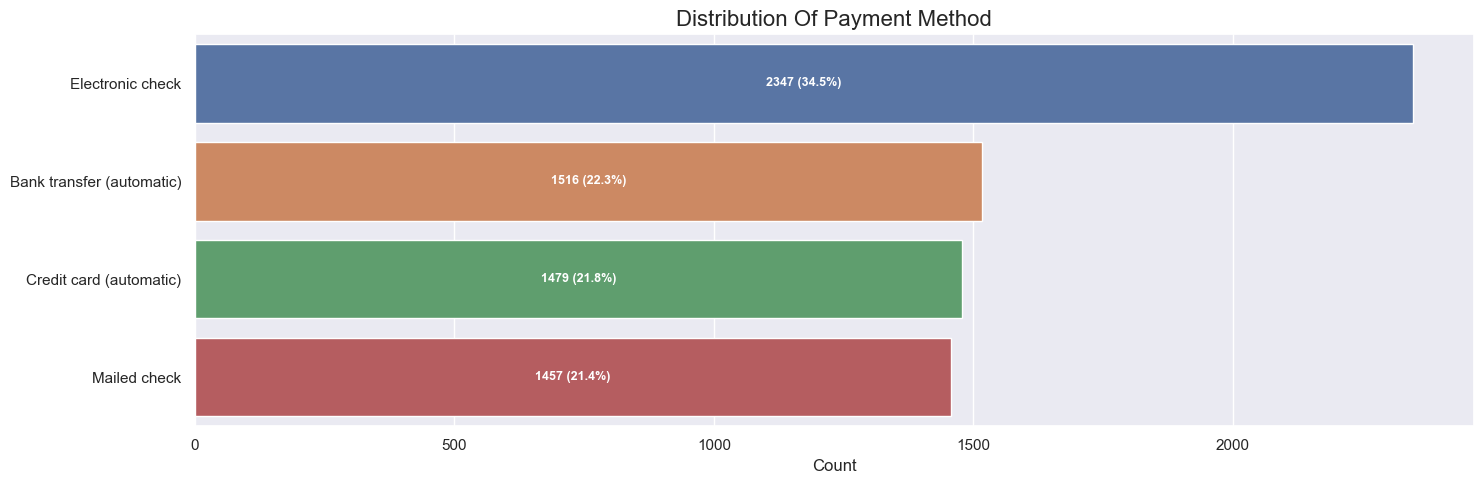

,Payment Method,Count,Percentage
0,Electronic check,2347,34.5%
1,Bank transfer (automatic),1516,22.3%
2,Credit card (automatic),1479,21.8%
3,Mailed check,1457,21.4%


In [45]:
plot_countplot_with_hue(df, 'PaymentMethod')

Distribusi metode pembayaran menunjukkan bahwa metode **electronic check** paling banyak digunakan, yaitu oleh **2.347 pelanggan (34,5%)**, diikuti dengan **bank transfer otomatis (22,3%)**, **kartu kredit otomatis (21,8%)**, dan **mailed check (21,4%)**. Jika dilihat dari tingkat churn sebelumnya, pelanggan dengan metode electronic check memiliki risiko churn yang lebih tinggi dibandingkan dengan metode pembayaran otomatis (bank transfer maupun kartu kredit), yang cenderung lebih stabil. Rekomendasi bisnis yang dapat dilakukan adalah **mendorong pelanggan untuk beralih dari electronic check ke metode pembayaran otomatis**, misalnya dengan memberikan potongan harga kecil, cashback, atau poin loyalitas khusus bagi yang menggunakan auto-payment.

### 2.6 Exploratory Data Analysis (EDA) - Bivariate

In [46]:
import re
import string
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

CHURN_PALETTE = {'No': 'gray', 'Yes': 'firebrick'}

# Helper: ubah camelCase atau PascalCase jadi "Camel Case"
def humanize_label(s):
    s = str(s)
    s = s.replace('_', ' ')
    s = re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', s)
    s = re.sub(r'(?<=[A-Z])(?=[A-Z][a-z])', ' ', s)
    return s.title()

def plot_box_hist_churn(df, col, target='Churn', figsize=(15, 5)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)  # default: sama besar
    title_col = humanize_label(col)
    fig.suptitle(f"{title_col} Distribution", fontsize=16)

    # --- Boxplot (kiri) ---
    sns.boxplot(
        data=df, x=col, y=target, orient='h',
        hue=target, palette=CHURN_PALETTE, ax=axes[0]
    )
    legend = axes[0].get_legend()
    if legend is not None:
        legend.remove()

    # --- Histogram (kanan) ---
    for label, color in CHURN_PALETTE.items():
        subset = df[df[target] == label]
        axes[1].hist(
            subset[col], bins=30, alpha=0.6, label=label, color=color, edgecolor="black"
        )
    axes[1].set_xlabel(title_col)
    axes[1].set_ylabel("Frequency")
    axes[1].legend(title=target)

    plt.tight_layout()
    plt.show()

    # ===== Statistik deskriptif =====
    stats = df.groupby(target)[col].describe()
    stats['IQR'] = stats['75%'] - stats['25%']
    display(stats)

    # ===== Uji Mann-Whitney U =====
    try:
        data_yes = df.loc[df[target] == 'Yes', col].dropna()
        data_no  = df.loc[df[target] == 'No',  col].dropna()

        if len(data_yes) > 0 and len(data_no) > 0:
            stat, pval = mannwhitneyu(data_yes, data_no, alternative='two-sided')
            print("Mann-Whitney U Test")
            print(f"H0: Distribusi {title_col} sama antara Churn=Yes dan Churn=No")
            print(f"H1: Distribusi {title_col} berbeda antara Churn=Yes dan Churn=No")
            print(f"U-statistic = {stat:.3f}, p-value = {pval:.5f}")

            if pval < 0.05:
                print(f"Kesimpulan: p < 0.05 → Tolak H0 → distribusi {title_col} BERBEDA signifikan.")
                print("Artinya: Ada bukti kuat bahwa perilaku distribusi kolom ini berbeda antara pelanggan churn dan tidak churn.")
            else:
                print(f"Kesimpulan: p ≥ 0.05 → Gagal menolak H0 → distribusi {title_col} TIDAK berbeda signifikan.")
                print("Artinya: Tidak ada bukti cukup untuk menyatakan adanya perbedaan distribusi antara pelanggan churn dan tidak churn.")
        else:
            print("Data tidak cukup untuk uji Mann-Whitney.")
    except Exception as e:
        print("Gagal melakukan uji Mann-Whitney:", e)

Fungsi `plot_box_hist_churn` digunakan untuk menganalisis distribusi variabel numerik berdasarkan kategori target seperti 'Churn'. Fungsi ini menghasilkan dua visualisasi berdampingan: boxplot horizontal yang memisahkan data berdasarkan nilai target untuk mengamati sebaran dan potensi outlier. Selain visualisasi, fungsi ini menghitung dan menampilkan tabel statistik deskriptif (count, mean, std, min, kuartil, dan IQR) yang dikelompokkan berdasarkan nilai target, sehingga mempermudah perbandingan karakteristik numerik antar kategori.


In [47]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_stacked_bar_churn_subplot(
    df, col, target='Churn', figsize=(14, 6),
    left_sort='none',          # none | alpha | total_count_desc | churn_count_desc | rate_desc | rate_asc | custom
    right_sort='rate_desc',    # none | alpha | total_count_desc | churn_count_desc | rate_desc | rate_asc | custom
    category_order=None,       # dipakai jika *_sort='custom'
    left_xtick_rotation=45     # rotasi label X di plot kiri
):
    """
    Subplot:
      Kiri  : grouped bar COUNT (series: Yes merah, No abu)
      Kanan : horizontal bar CHURN RATE (%), default urut dari tertinggi → terendah
    Tabel ringkas: Count Total | Count Churn | Churn Rate (%), baris mengikuti urutan plot kiri.
    """

    # ===== Helper: humanize label (CamelCase -> "Camel Case", underscore -> space, Title Case) =====
    def humanize_label(s):
        s = str(s)
        s = s.replace('_', ' ')
        # pisah CamelCase & akronim diikuti huruf kecil (HTTPServer -> HTTP Server)
        s = re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', s)
        s = re.sub(r'(?<=[A-Z])(?=[A-Z][a-z])', ' ', s)
        return s.title()

    # ===== Validasi input =====
    if col not in df.columns:
        raise ValueError(f"Kolom '{col}' tidak ada di dataframe.")
    if target not in df.columns:
        raise ValueError(f"Kolom target '{target}' tidak ada di dataframe.")

    # Pastikan nilai target berupa string 'Yes'/'No' (atau bisa dipetakan)
    df_local = df[[col, target]].copy()
    df_local[target] = df_local[target].astype(str)

    # ===== Aggregasi dasar =====
    counts = df_local.groupby([col, target], observed=True).size().unstack(fill_value=0)

    # Pastikan dua kolom ada
    for k in ['Yes', 'No']:
        if k not in counts.columns:
            counts[k] = 0

    # Urutan seri: Yes (merah) lalu No (abu)
    counts = counts[['Yes', 'No']]
    denom = counts.sum(axis=1).replace(0, np.nan)
    percentages = counts.div(denom, axis=0) * 100
    percentages = percentages.fillna(0)

    # ===== Warna (pakai CHURN_PALETTE kalau tersedia) =====
    def color_for(key, default):
        try:
            return CHURN_PALETTE.get(key, default)  # type: ignore
        except NameError:
            return default
    color_yes = color_for('Yes', '#d62728')   # merah
    color_no  = color_for('No',  '#9e9e9e')   # abu

    # ===== Helper sorting =====
    def sort_index(mode, counts_df, pct_df, base_index, custom=None):
        if mode in (None, 'none'):
            return base_index
        if mode == 'alpha':
            return sorted(list(base_index))
        if mode == 'total_count_desc':
            return counts_df.sum(axis=1).sort_values(ascending=False).index
        if mode == 'churn_count_desc':
            return counts_df['Yes'].sort_values(ascending=False).index
        if mode == 'rate_desc':
            return pct_df['Yes'].sort_values(ascending=False).index
        if mode == 'rate_asc':
            return pct_df['Yes'].sort_values(ascending=True).index
        if mode == 'custom':
            if not custom:
                raise ValueError("category_order harus diisi saat mode='custom'.")
            return [c for c in custom if c in base_index]
        return base_index

    base_idx   = counts.index
    left_idx   = sort_index(left_sort,  counts, percentages, base_idx, category_order)
    right_idx  = sort_index(right_sort, counts, percentages, base_idx, category_order)

    counts_left       = counts.loc[left_idx]
    counts_right      = counts.loc[right_idx]
    percentages_right = percentages.loc[right_idx]

    # ===== Plot =====
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=figsize)

    # ---- Kiri: grouped COUNT ----
    x = np.arange(len(counts_left.index))
    w = 0.38
    bars_yes = ax_left.bar(x - w/2, counts_left['Yes'].values, w, label='Yes', color=color_yes)
    bars_no  = ax_left.bar(x + w/2, counts_left['No'].values,  w, label='No',  color=color_no)

    ax_left.set_xticks(x)
    ax_left.set_xticklabels([humanize_label(v) for v in counts_left.index])
    plt.setp(ax_left.get_xticklabels(), rotation=left_xtick_rotation, ha='right')

    ax_left.set_ylabel('Count')
    ax_left.set_title(f"Count By {humanize_label(col)} And {humanize_label(target)}")
    ax_left.legend(title=target, loc='best')

    # Anotasi count (putih semua)
    for b in list(bars_yes) + list(bars_no):
        h = b.get_height()
        if h > 0:
            ax_left.text(
                b.get_x() + b.get_width()/2, h,
                f'{int(h):,}',
                ha='center', va='bottom', fontsize=9, color='white'
            )

    # ---- Kanan: CHURN RATE horizontal ----
    churn_rate = percentages_right['Yes'].values
    bars_rate = ax_right.barh(
        [humanize_label(v) for v in percentages_right.index],
        churn_rate, height=0.6, color=color_yes
    )

    overall = (counts['Yes'].sum() / counts.sum().sum() * 100) if counts.sum().sum() > 0 else 0.0
    ax_right.axvline(overall, linestyle='--', linewidth=1.5)

    # Label "Overall" di bawah area plot
    ax_right.annotate(
        f'Overall: {overall:.1f}%',
        xy=(overall, 0), xycoords=('data', 'axes fraction'),
        xytext=(6, 6), textcoords='offset points',
        ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.85)
    )

    if right_sort in {'rate_desc', 'total_count_desc', 'churn_count_desc'}:
        ax_right.invert_yaxis()

    ax_right.set_xlabel('Churn Rate (%)')
    ax_right.set_title(f"Churn Rate By {humanize_label(col)}")

    # Anotasi rate (putih semua)
    for b, pct in zip(bars_rate, churn_rate):
        cx = b.get_width() * 0.5
        cy = b.get_y() + b.get_height() / 2
        ax_right.text(
            cx, cy, f'{pct:.1f}%',
            ha='center', va='center',
            fontsize=9, fontweight='bold',
            color='white'
        )

    plt.suptitle(f"{humanize_label(col)} Vs {humanize_label(target)}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

    # ===== Tabel ringkas (satu saja) =====
    ordered_idx = counts_left.index
    table = pd.DataFrame(index=ordered_idx)
    table.index.name = col
    table['Count Total']    = counts_left.sum(axis=1).astype(int)
    table['Count Churn']    = counts_left['Yes'].astype(int)
    table['Churn Rate (%)'] = percentages.loc[ordered_idx, 'Yes'].map(lambda x: f'{x:.1f}%')

    return table

Fungsi `plot_stacked_bar_churn_subplot` digunakan untuk memvisualisasikan distribusi variabel kategorikal berdasarkan target seperti 'Churn' dalam bentuk stacked bar chart horizontal. Fungsi ini menghitung jumlah dan persentase tiap kategori target dalam setiap kelas variabel, lalu mengurutkan data berdasarkan persentase kategori 'No' secara menaik. Visualisasi menampilkan batang tersegmentasi untuk masing-masing kategori target, disertai anotasi berupa persentase dan jumlah absolut untuk mempermudah interpretasi. Fungsi ini sangat berguna untuk membandingkan proporsi churn antar kategori dan mengidentifikasi kelompok dengan tingkat churn tinggi.


#### 2.6.1 Bagaimana perbedaan tenure antara yang churn dan tidak churn ?

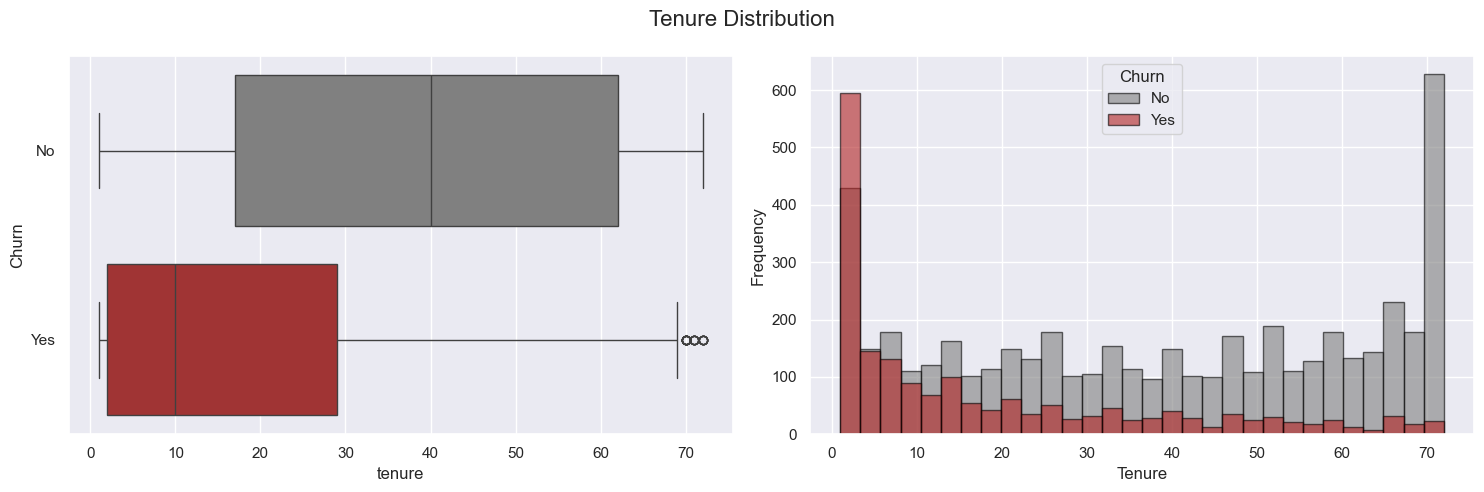

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,38.872620,23.878867,1.0,17.0,40.0,62.0,72.0,45.0
Yes,1861.0,18.030629,19.556195,1.0,2.0,10.0,29.0,72.0,27.0


Mann-Whitney U Test
H0: Distribusi Tenure sama antara Churn=Yes dan Churn=No
H1: Distribusi Tenure berbeda antara Churn=Yes dan Churn=No
U-statistic = 2276865.500, p-value = 0.00000
Kesimpulan: p < 0.05 → Tolak H0 → distribusi Tenure BERBEDA signifikan.
Artinya: Ada bukti kuat bahwa perilaku distribusi kolom ini berbeda antara pelanggan churn dan tidak churn.


In [48]:
plot_box_hist_churn(df, 'tenure')

Pelanggan yang tidak churn memiliki rata-rata tenure sekitar **39 bulan** (median **40 bulan**) dengan sebaran antara **1–72 bulan** dan IQR **45 bulan**. Sebaliknya, pelanggan churn rata-rata hanya berlangganan sekitar **18 bulan** (median **10 bulan**) dengan sebaran antara **1–72 bulan** dan IQR **27 bulan**, yang menunjukkan distribusinya lebih sempit. Perbedaan ini memperlihatkan bahwa pelanggan churn cenderung berhenti lebih cepat dibandingkan pelanggan yang tidak churn. Oleh karena itu, perusahaan perlu memprioritaskan retensi di **12 bulan pertama** melalui onboarding yang baik, program loyalitas, monitoring churn lebih dini, serta menjaga keterikatan pelanggan lama dengan penawaran bernilai tambah.

Revisi: Subplot histogram sebelah boxplot + uji mann whitney u.

#### 2.6.2 Bagaimana perbedaan total charges yang churn dan tidak churn ?


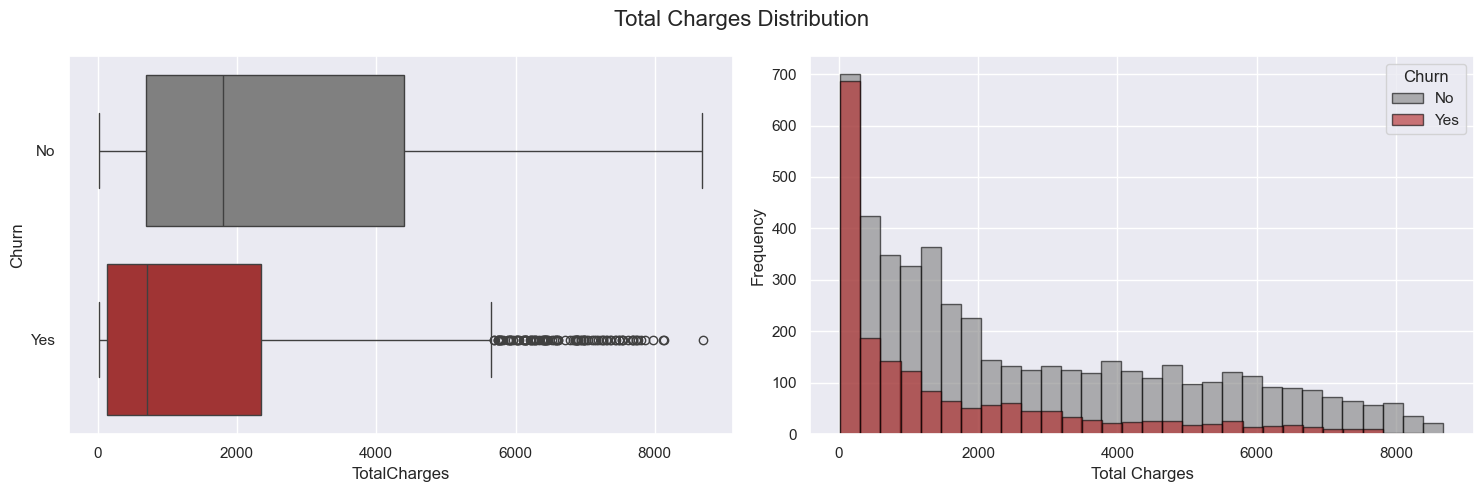

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,2655.957493,2331.711899,18.85,688.625,1802.35,4392.2375,8672.45,3703.6125
Yes,1861.0,1537.272810,1893.004442,18.85,134.500,712.85,2342.2000,8684.80,2207.7000


Mann-Whitney U Test
H0: Distribusi Total Charges sama antara Churn=Yes dan Churn=No
H1: Distribusi Total Charges berbeda antara Churn=Yes dan Churn=No
U-statistic = 3078586.000, p-value = 0.00000
Kesimpulan: p < 0.05 → Tolak H0 → distribusi Total Charges BERBEDA signifikan.
Artinya: Ada bukti kuat bahwa perilaku distribusi kolom ini berbeda antara pelanggan churn dan tidak churn.


In [49]:
plot_box_hist_churn(df, 'TotalCharges')

Pelanggan yang tidak churn memiliki rata-rata total pembayaran sekitar **\$2.656** (median **\$1.802**) dengan rentang **\$18,85–\$8.672,45** dan IQR **\$3.704**. Sebaliknya, pelanggan churn rata-rata hanya membayar sekitar **\$1.537** (median **\$713**) dengan rentang **\$18,85–\$8.684,8** dan IQR **\$2.208**, sehingga distribusinya lebih sempit. Hal ini menunjukkan bahwa pelanggan churn umumnya berhenti lebih cepat dengan total pembayaran lebih rendah, sedangkan pelanggan yang tidak churn memiliki pembayaran lebih tinggi dan bervariasi. Oleh karena itu, perusahaan sebaiknya fokus mempertahankan pelanggan dengan total pembayaran rendah di awal melalui peningkatan layanan, program loyalitas, dan monitoring churn lebih dini.

#### 2.6.3 Bagaimana perbedaan monthly charges antara yang churn dan tidak churn ?


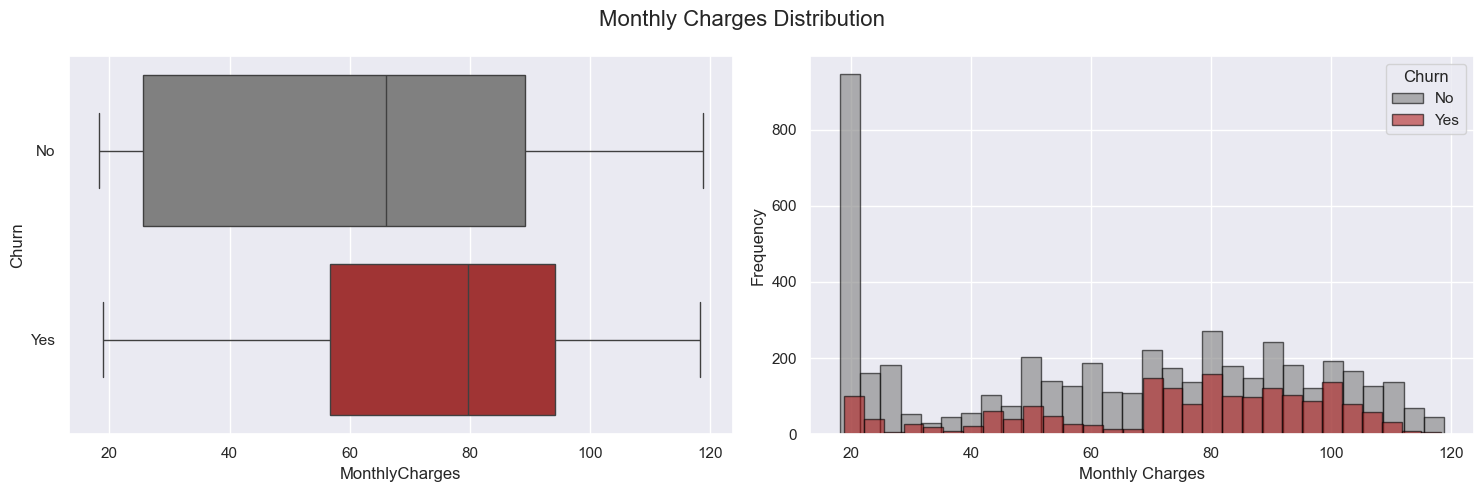

,count,mean,std,min,25%,50%,75%,max,IQR
Churn,,,,,,,,,
No,4938.0,62.676387,30.848467,18.25,25.60,66.125,89.25,118.75,63.65
Yes,1861.0,74.573267,24.563471,18.85,56.65,79.650,94.25,118.35,37.60


Mann-Whitney U Test
H0: Distribusi Monthly Charges sama antara Churn=Yes dan Churn=No
H1: Distribusi Monthly Charges berbeda antara Churn=Yes dan Churn=No
U-statistic = 5596313.500, p-value = 0.00000
Kesimpulan: p < 0.05 → Tolak H0 → distribusi Monthly Charges BERBEDA signifikan.
Artinya: Ada bukti kuat bahwa perilaku distribusi kolom ini berbeda antara pelanggan churn dan tidak churn.


In [50]:
plot_box_hist_churn(df, 'MonthlyCharges')

Pelanggan yang tidak churn memiliki rata-rata biaya bulanan sekitar **\$62,68** (median **\$66,13**) dengan sebaran antara **\$18,25–\$118,75** dan IQR **\$63,65**. Sebaliknya, pelanggan churn rata-rata membayar lebih tinggi, yaitu sekitar **\$74,57** (median **\$79,65**) dengan sebaran antara **\$18,85–\$118,35** dan IQR **\$37,60**, yang menunjukkan distribusinya lebih sempit. Perbedaan ini memperlihatkan bahwa pelanggan churn cenderung memiliki biaya bulanan lebih tinggi dibandingkan pelanggan yang tidak churn. Oleh karena itu, perusahaan sebaiknya memperhatikan segmen pelanggan dengan biaya bulanan tinggi melalui penawaran paket yang lebih fleksibel, diskon, atau benefit tambahan agar risiko churn dapat ditekan.


#### 2.6.4 Bagaimana perbedaan tingkat churn antara gender ?

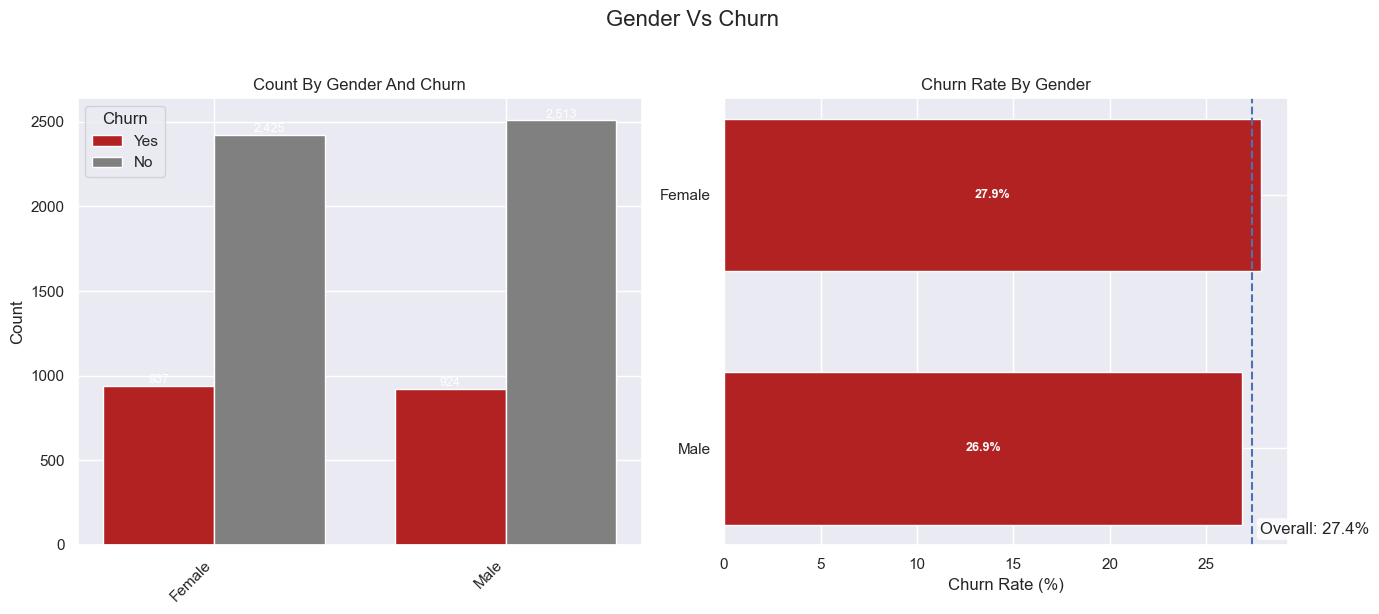

,Count Total,Count Churn,Churn Rate (%)
gender,,,
Female,3362,937,27.9%
Male,3437,924,26.9%


In [51]:
plot_stacked_bar_churn_subplot(df, 'gender')

Pelanggan **laki-laki** berjumlah **3.437** dengan **924 churn** sehingga churn rate-nya **26,9%**. Sementara itu, pelanggan **perempuan** berjumlah **3.362** dengan **937 churn** dan churn rate **27,9%**. Perbedaan tingkat churn antara laki-laki dan perempuan relatif kecil, keduanya berada di churn rate sekitar angka **27,4%**. Hal ini menunjukkan bahwa **gender tidak menjadi faktor signifikan** dalam perbedaan risiko churn, sehingga strategi retensi lebih tepat difokuskan pada faktor lain yang memiliki pengaruh lebih besar.

Revisi: Tambahkan .title() di variabel biar rapih. Revisi rata2 keseluruhan, churn rate.

#### 2.6.5 Bagaimana perbedaan tingkat churn berdasarkan senior citizen ?


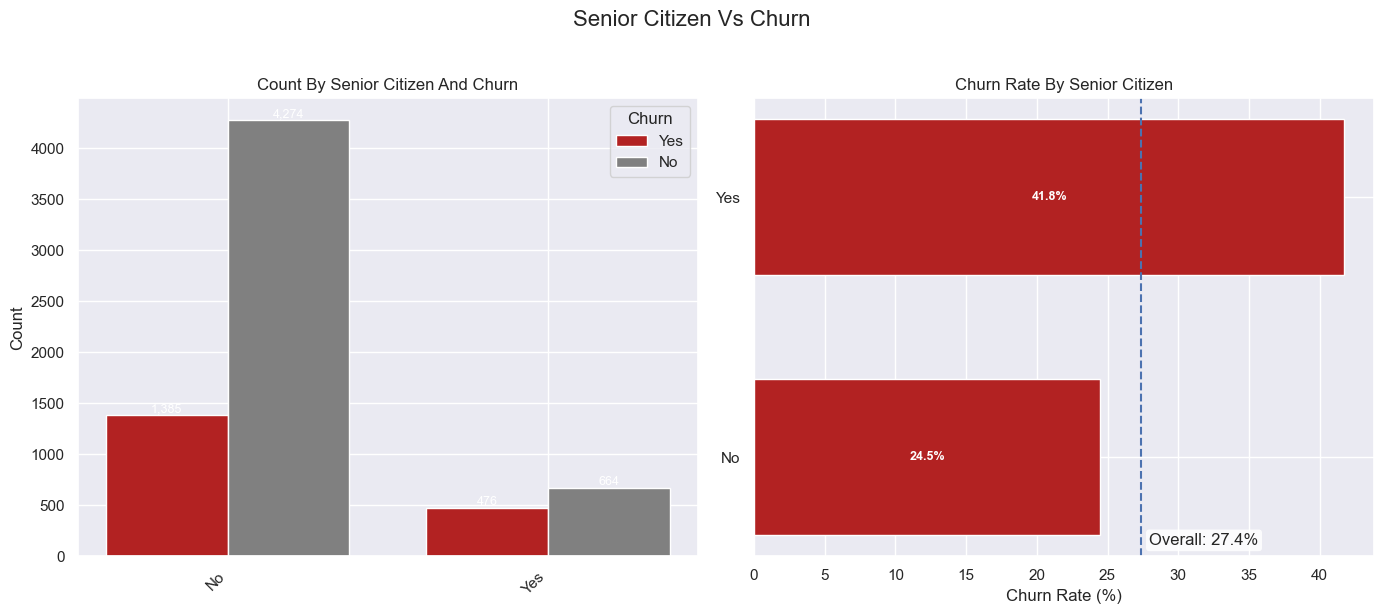

,Count Total,Count Churn,Churn Rate (%)
SeniorCitizen,,,
No,5659,1385,24.5%
Yes,1140,476,41.8%


In [52]:
# Mapping Column SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})
plot_stacked_bar_churn_subplot(df, 'SeniorCitizen')

Pelanggan yang bukan **Senior Citizen** memiliki total 5.659 orang dengan 1.385 churn, sehingga churn rate-nya **24,5%**, lebih rendah dari rata-rata keseluruhan (**27,4%**). Sebaliknya, pelanggan **Senior Citizen** berjumlah 1.140 orang dengan 476 churn, menghasilkan churn rate jauh lebih tinggi yaitu **41,8%**. Perbedaan ini menunjukkan bahwa pelanggan Senior Citizen memiliki risiko churn yang lebih besar dibandingkan pelanggan non-Senior Citizen. Oleh karena itu, perusahaan perlu memberikan perhatian khusus pada segmen Senior Citizen, misalnya dengan paket layanan yang lebih sederhana, harga yang lebih terjangkau, serta dukungan pelanggan yang lebih intensif agar churn pada kelompok ini dapat ditekan.


#### 2.6.6 Bagaimana perbedaan tingkat churn antara partner ?


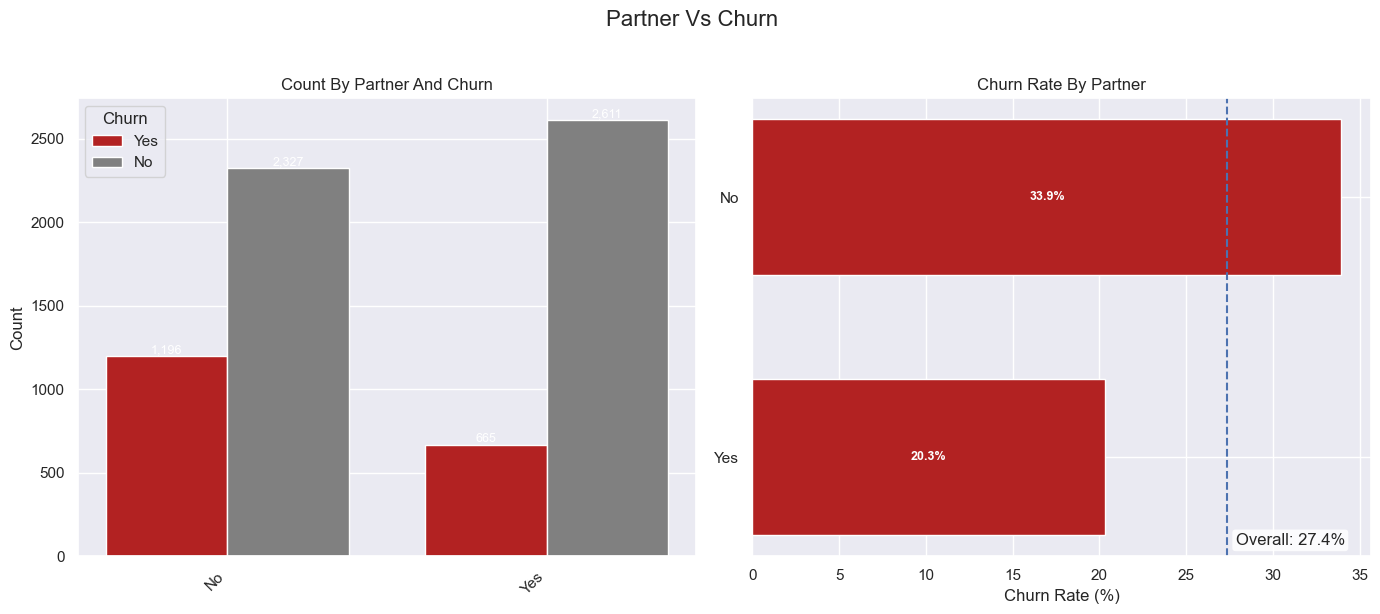

,Count Total,Count Churn,Churn Rate (%)
Partner,,,
No,3523,1196,33.9%
Yes,3276,665,20.3%


In [53]:
plot_stacked_bar_churn_subplot(df, 'Partner')

Pelanggan yang **tidak memiliki partner** berjumlah **3.523** dengan **1.196 churn**, sehingga churn rate mencapai **33,9%**, lebih tinggi dari rata-rata keseluruhan **27,4%**. Sebaliknya, pelanggan yang **memiliki partner** berjumlah **3.276** dengan **665 churn**, sehingga churn rate hanya **20,3%**. Perbedaan ini cukup signifikan dan menunjukkan bahwa pelanggan dengan partner cenderung lebih loyal dibandingkan yang tidak memiliki partner. Oleh karena itu, perusahaan dapat mempertimbangkan strategi retensi yang lebih intensif untuk segmen pelanggan tanpa partner, misalnya dengan memberikan benefit tambahan atau program keterikatan yang dapat meningkatkan loyalitas.


#### 2.6.7 Bagaimana perbedaan tingkat churn antara dependents ?


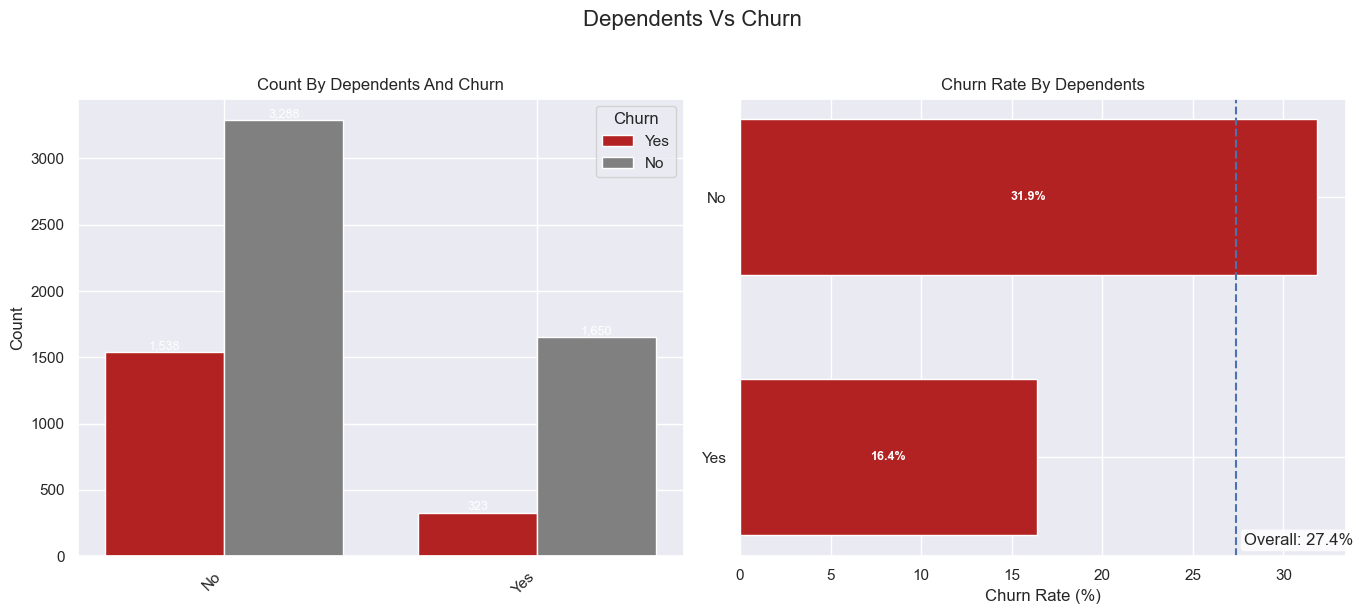

,Count Total,Count Churn,Churn Rate (%)
Dependents,,,
No,4826,1538,31.9%
Yes,1973,323,16.4%


In [54]:
plot_stacked_bar_churn_subplot(df, 'Dependents')

Pelanggan yang **tidak memiliki dependents** berjumlah **4.826** dengan **1.538 churn**, sehingga churn rate mencapai **31,9%**, lebih tinggi dari rata-rata keseluruhan **27,4%**. Sebaliknya, pelanggan yang **memiliki dependents** berjumlah **1.973** dengan **323 churn**, sehingga churn rate hanya **16,4%**. Perbedaan ini cukup signifikan dan menunjukkan bahwa pelanggan dengan dependents lebih loyal dibandingkan pelanggan tanpa dependents. Oleh karena itu, perusahaan sebaiknya memberikan perhatian lebih pada segmen pelanggan tanpa dependents, misalnya melalui penawaran paket menarik atau program retensi khusus untuk meningkatkan keterikatan mereka.


#### 2.6.8 Bagaimanakah tingkat churn berbeda berdasarkan phone service ?


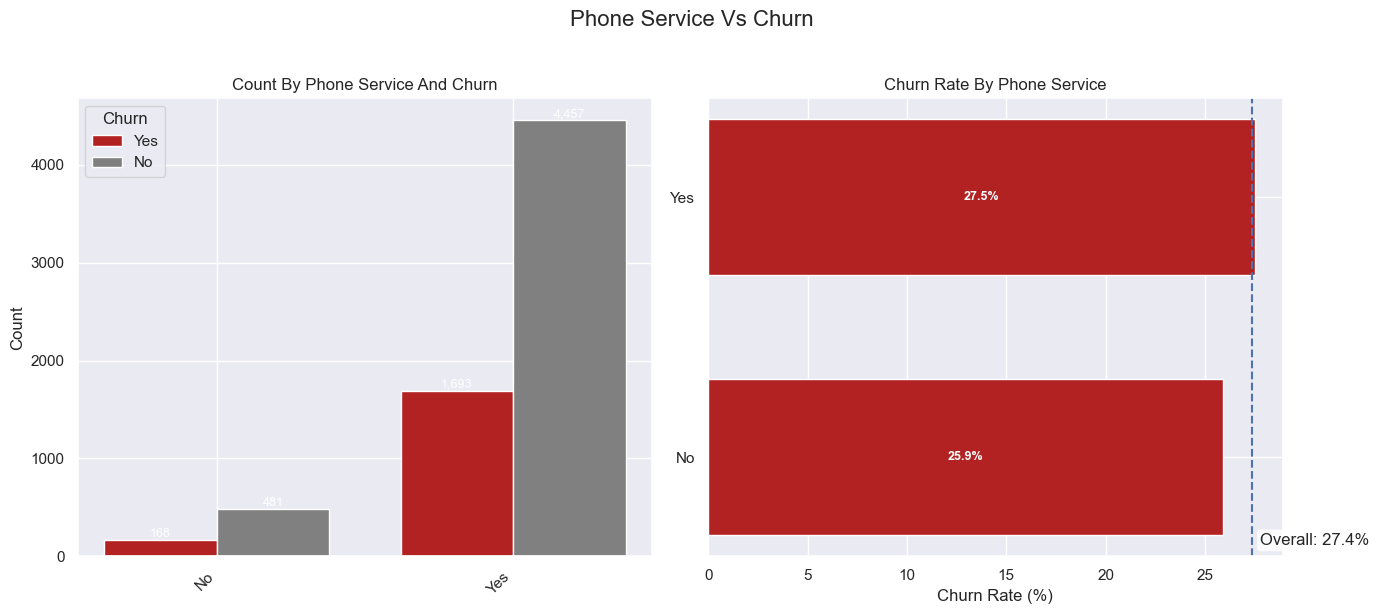

,Count Total,Count Churn,Churn Rate (%)
PhoneService,,,
No,649,168,25.9%
Yes,6150,1693,27.5%


In [55]:
plot_stacked_bar_churn_subplot(df, 'PhoneService')

Pelanggan yang **menggunakan PhoneService** berjumlah **6.150** dengan **1.693 churn**, sehingga churn rate tercatat **27,5%**. Sementara itu, pelanggan yang **tidak menggunakan PhoneService** berjumlah **649** dengan **168 churn**, menghasilkan churn rate **25,9%**. Perbedaan churn rate antara kedua kelompok ini relatif kecil dan keduanya berada dekat dengan rata-rata keseluruhan **27,4%**. Hal ini menunjukkan bahwa **PhoneService tidak memiliki pengaruh signifikan** terhadap churn, sehingga faktor lain lebih relevan untuk dijadikan prioritas dalam strategi retensi.


#### 2.6.9 Bagaimanakah tingkat churn berbeda berdasarkan multiple lines ?


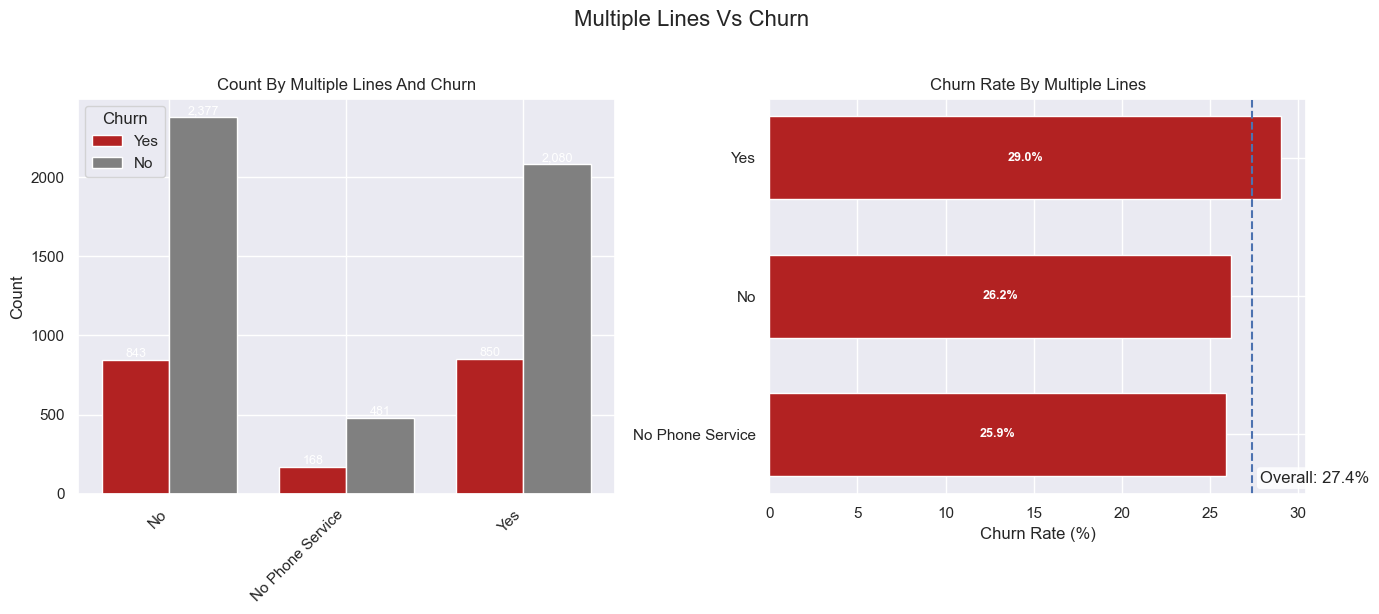

,Count Total,Count Churn,Churn Rate (%)
MultipleLines,,,
No,3220,843,26.2%
No phone service,649,168,25.9%
Yes,2930,850,29.0%


In [56]:
plot_stacked_bar_churn_subplot(df, 'MultipleLines')

Pelanggan yang **menggunakan multiple lines** berjumlah **2.930** dengan **850 churn**, sehingga churn rate mencapai **29,0%**, sedikit lebih tinggi dari rata-rata keseluruhan **27,4%**. Pelanggan yang **tidak menggunakan multiple lines** berjumlah **3.220** dengan **843 churn**, churn rate **26,2%**, sedangkan pelanggan yang **tidak menggunakan phone service** berjumlah **649** dengan **168 churn**, churn rate **25,9%**. Perbedaan churn rate antar kelompok ini relatif kecil, meskipun pelanggan yang menggunakan multiple lines memiliki risiko churn sedikit lebih tinggi dibandingkan kelompok lainnya. Hal ini menunjukkan bahwa penggunaan multiple lines tidak terlalu signifikan terhadap churn, namun tetap bisa diperhatikan sebagai faktor tambahan dalam analisis retensi.

#### 2.6.10 Bagaimanakah tingkat churn berbeda berdasarkan internet service ?


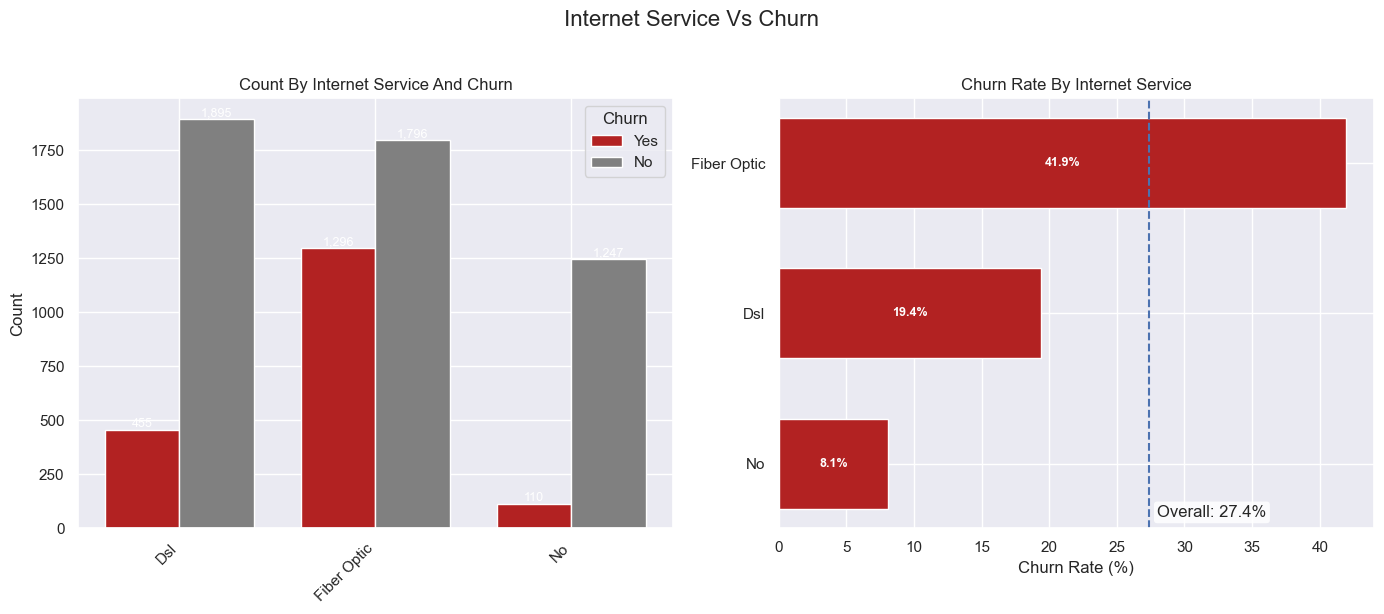

,Count Total,Count Churn,Churn Rate (%)
InternetService,,,
DSL,2350,455,19.4%
Fiber optic,3092,1296,41.9%
No,1357,110,8.1%


In [57]:
plot_stacked_bar_churn_subplot(df, 'InternetService')

Pelanggan yang **menggunakan internet fiber optic** berjumlah **3.092** dengan **1.296 churn**, sehingga churn rate mencapai **41,9%**, jauh lebih tinggi dari rata-rata keseluruhan **27,4%**. Pelanggan yang **menggunakan internet DSL** berjumlah **2.350** dengan **455 churn**, churn rate **19,4%**, sedangkan pelanggan yang **tidak menggunakan internet** berjumlah **1.357** dengan **110 churn**, churn rate hanya **8,1%**. Perbedaan ini cukup mencolok dan menunjukkan bahwa pelanggan fiber optic memiliki risiko churn paling tinggi, sementara pelanggan tanpa layanan internet justru paling rendah. Hal ini mengindikasikan bahwa jenis layanan internet berpengaruh besar terhadap churn, sehingga perusahaan perlu memberi perhatian khusus pada pengguna fiber optic, misalnya melalui peningkatan kualitas layanan.

Revisi: Anotasi churn rate diseragamin warnanya.

#### 2.6.11 Bagaimanakah tingkat churn berbeda berdasarkan online security ?


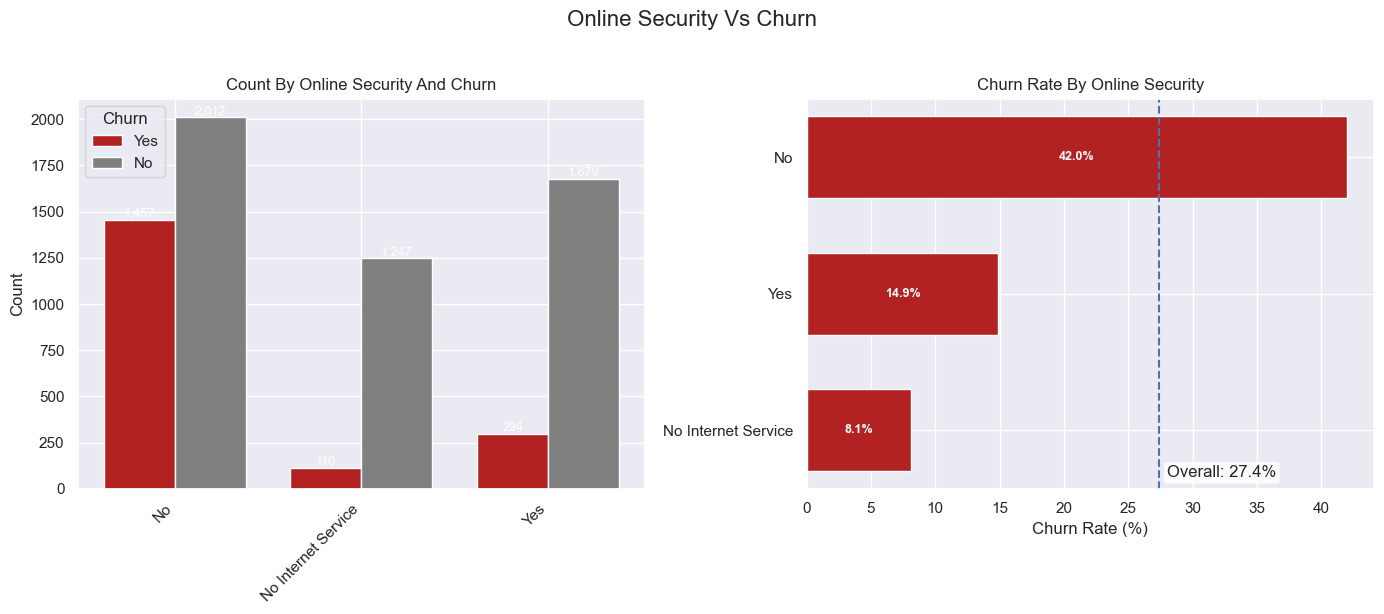

,Count Total,Count Churn,Churn Rate (%)
OnlineSecurity,,,
No,3469,1457,42.0%
No internet service,1357,110,8.1%
Yes,1973,294,14.9%


In [58]:
plot_stacked_bar_churn_subplot(df, 'OnlineSecurity')

Pelanggan yang **tidak menggunakan layanan OnlineSecurity** berjumlah **3.469** dengan **1.457 churn**, sehingga churn rate mencapai **42,0%**, jauh lebih tinggi dari rata-rata keseluruhan **27,4%**. Pelanggan yang **menggunakan OnlineSecurity** berjumlah **1.973** dengan **294 churn**, churn rate hanya **14,9%**, sedangkan pelanggan yang **tidak menggunakan internet** berjumlah **1.357** dengan **110 churn**, churn rate **8,1%**. Perbedaan ini sangat signifikan dan menunjukkan bahwa keberadaan layanan OnlineSecurity berperan besar dalam menurunkan churn. Dengan demikian, perusahaan perlu mendorong lebih banyak pelanggan untuk berlangganan layanan OnlineSecurity sebagai bagian dari strategi retensi.


#### 2.6.12 Bagaimanakah tingkat churn berbeda berdasarkan online backup ?


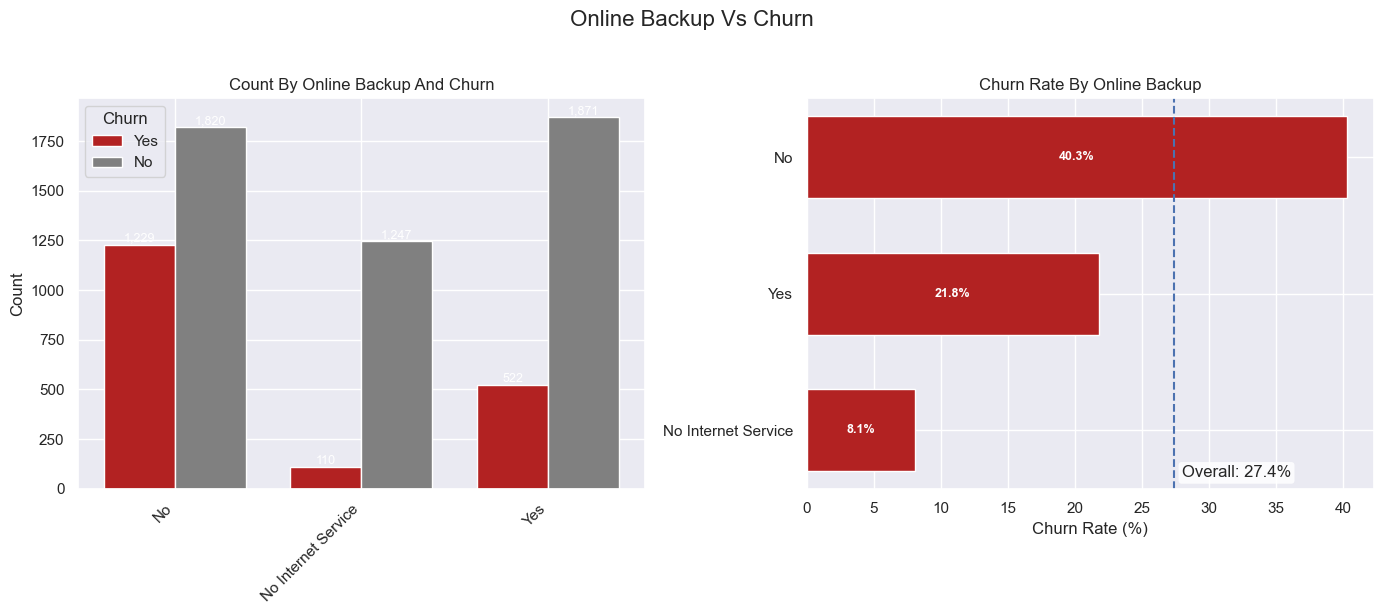

,Count Total,Count Churn,Churn Rate (%)
OnlineBackup,,,
No,3049,1229,40.3%
No internet service,1357,110,8.1%
Yes,2393,522,21.8%


In [59]:
plot_stacked_bar_churn_subplot(df, 'OnlineBackup')

Pelanggan yang **tidak menggunakan layanan OnlineBackup** berjumlah **3.049** dengan **1.229 churn**, sehingga churn rate mencapai **40,3%**, jauh lebih tinggi dari rata-rata keseluruhan **27,4%**. Pelanggan yang **menggunakan OnlineBackup** berjumlah **2.393** dengan **522 churn**, churn rate hanya **21,8%**, sedangkan pelanggan yang **tidak menggunakan internet** berjumlah **1.357** dengan **110 churn**, churn rate **8,1%**. Perbedaan ini cukup signifikan dan menunjukkan bahwa keberadaan layanan OnlineBackup dapat membantu menurunkan churn. Oleh karena itu, perusahaan sebaiknya mendorong lebih banyak pelanggan untuk menggunakan layanan OnlineBackup sebagai bagian dari strategi retensi.


#### 2.6.13 Bagaimanakah tingkat churn berbeda berdasarkan device protection ?


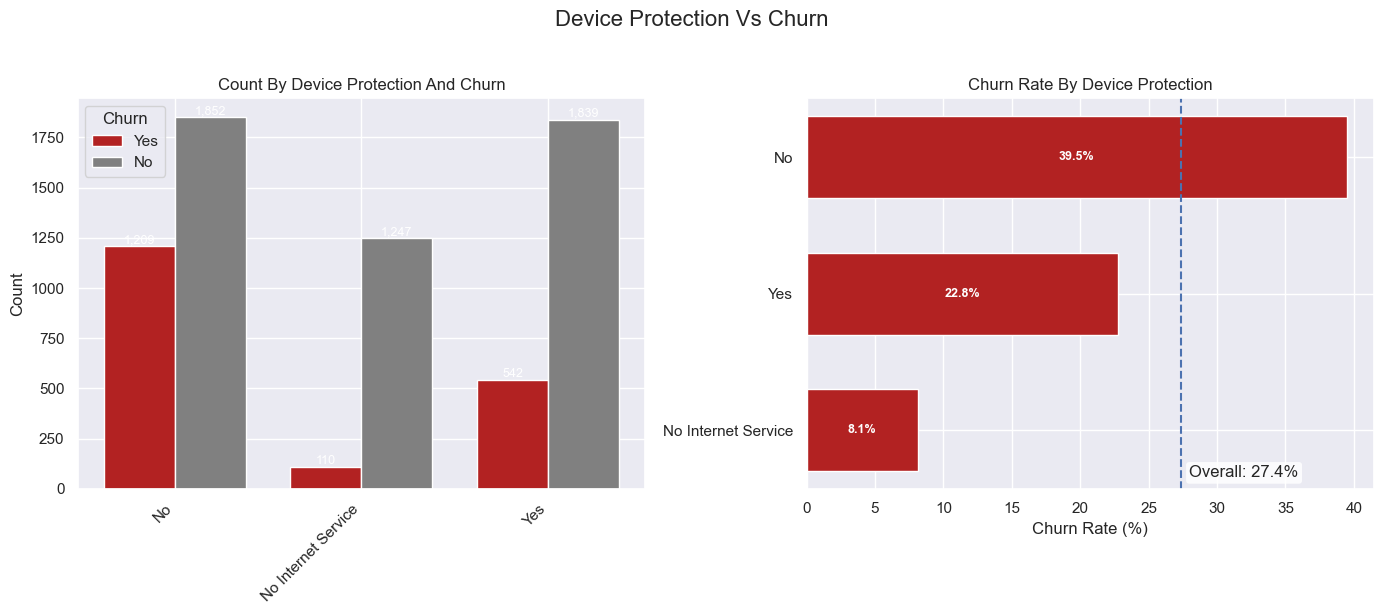

,Count Total,Count Churn,Churn Rate (%)
DeviceProtection,,,
No,3061,1209,39.5%
No internet service,1357,110,8.1%
Yes,2381,542,22.8%


In [60]:
plot_stacked_bar_churn_subplot(df, 'DeviceProtection')

Pelanggan yang **tidak menggunakan DeviceProtection** berjumlah **3.061** dengan **1.209 churn**, sehingga churn rate mencapai **39,5%**, jauh lebih tinggi dari rata-rata keseluruhan **27,4%**. Pelanggan yang **menggunakan DeviceProtection** berjumlah **2.381** dengan **542 churn**, churn rate lebih rendah yaitu **22,8%**, sedangkan pelanggan yang **tidak menggunakan internet** berjumlah **1.357** dengan **110 churn**, churn rate **8,1%**. Perbedaan ini cukup signifikan dan menunjukkan bahwa penggunaan DeviceProtection dapat membantu menekan churn. Oleh karena itu, perusahaan sebaiknya mendorong lebih banyak pelanggan untuk berlangganan layanan DeviceProtection sebagai bagian dari strategi retensi.


#### 2.6.14 Bagaimanakah tingkat churn berbeda berdasarkan tech support ?


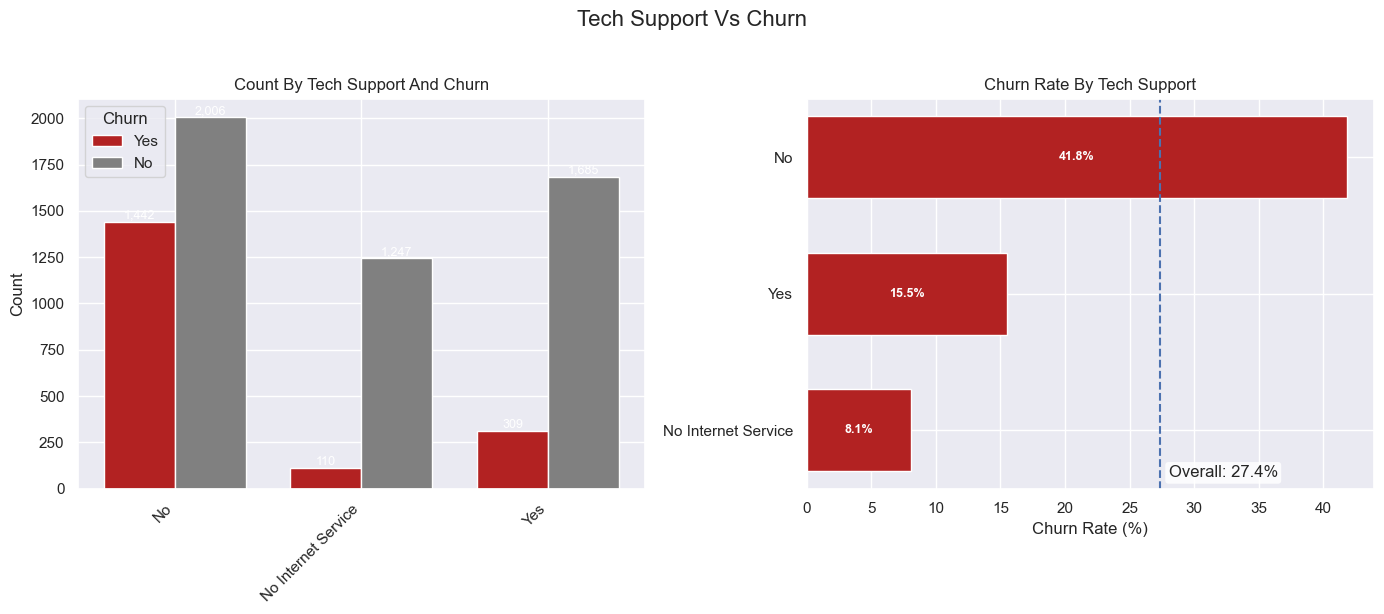

,Count Total,Count Churn,Churn Rate (%)
TechSupport,,,
No,3448,1442,41.8%
No internet service,1357,110,8.1%
Yes,1994,309,15.5%


In [61]:
plot_stacked_bar_churn_subplot(df, 'TechSupport')

Pelanggan yang **tidak menggunakan TechSupport** berjumlah **3.448** dengan **1.442 churn**, sehingga churn rate mencapai **41,8%**, jauh lebih tinggi dari rata-rata keseluruhan **27,4%**. Pelanggan yang **menggunakan TechSupport** berjumlah **1.994** dengan **309 churn**, churn rate hanya **15,5%**, sedangkan pelanggan yang **tidak menggunakan internet** berjumlah **1.357** dengan **110 churn**, churn rate **8,1%**. Perbedaan ini sangat signifikan dan menunjukkan bahwa keberadaan layanan TechSupport dapat membantu menurunkan churn secara drastis. Oleh karena itu, perusahaan sebaiknya mendorong lebih banyak pelanggan untuk menggunakan layanan TechSupport sebagai bagian dari strategi retensi.


#### 2.6.15 Bagaimanakah tingkat churn berbeda berdasarkan streaming tv ?


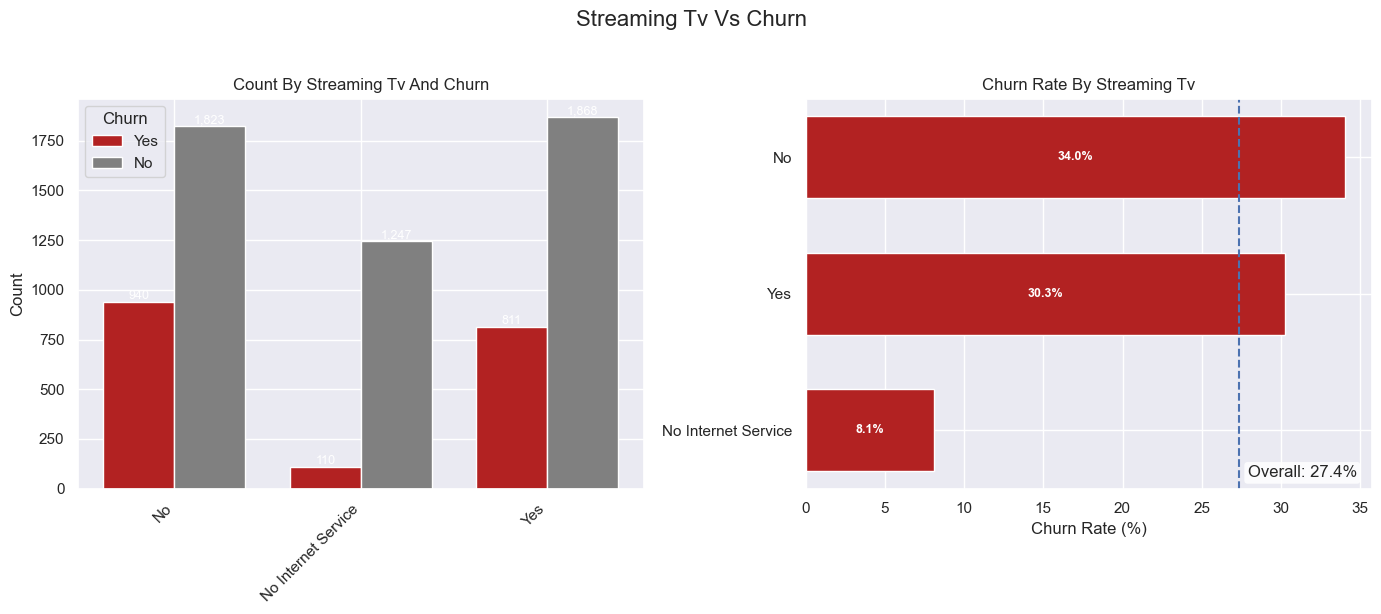

,Count Total,Count Churn,Churn Rate (%)
StreamingTV,,,
No,2763,940,34.0%
No internet service,1357,110,8.1%
Yes,2679,811,30.3%


In [62]:
plot_stacked_bar_churn_subplot(df, 'StreamingTV')

Pelanggan yang **tidak menggunakan StreamingTV** berjumlah **2.763** dengan **940 churn**, sehingga churn rate mencapai **34,0%**. Pelanggan yang **menggunakan StreamingTV** berjumlah **2.679** dengan **811 churn**, churn rate **30,3%**, sedangkan pelanggan yang **tidak menggunakan internet** berjumlah **1.357** dengan **110 churn**, churn rate jauh lebih rendah yaitu **8,1%**. Perbedaan ini menunjukkan bahwa baik pelanggan yang menggunakan maupun tidak menggunakan StreamingTV sama-sama memiliki churn rate relatif tinggi, di atas rata-rata keseluruhan **27,4%**. Hal ini mengindikasikan bahwa layanan StreamingTV sendiri tidak cukup kuat menahan churn, sehingga perusahaan perlu meningkatkan nilai tambahnya, misalnya dengan paket bundling eksklusif atau konten premium untuk memperkuat loyalitas pelanggan.


#### 2.6.16 Bagaimanakah tingkat churn berbeda berdasarkan streaming movies ?


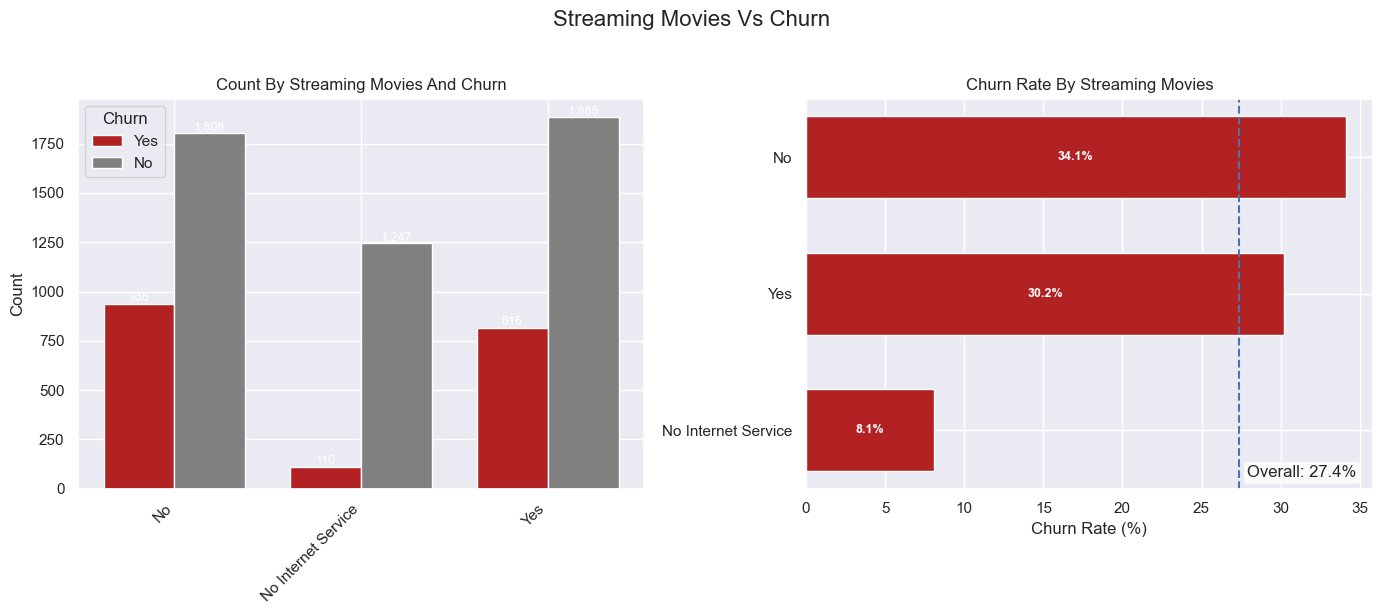

,Count Total,Count Churn,Churn Rate (%)
StreamingMovies,,,
No,2741,935,34.1%
No internet service,1357,110,8.1%
Yes,2701,816,30.2%


In [63]:
plot_stacked_bar_churn_subplot(df, 'StreamingMovies')

Pelanggan yang **tidak menggunakan StreamingMovies** berjumlah **2.741** dengan **935 churn**, sehingga churn rate mencapai **34,1%**. Pelanggan yang **menggunakan StreamingMovies** berjumlah **2.701** dengan **816 churn**, churn rate **30,2%**, sedangkan pelanggan yang **tidak menggunakan internet** berjumlah **1.357** dengan **110 churn**, churn rate **8,1%**. Perbedaan ini menunjukkan bahwa baik pelanggan yang menggunakan maupun tidak menggunakan StreamingMovies sama-sama memiliki churn rate relatif tinggi, di atas rata-rata keseluruhan **27,4%**. Hal ini mengindikasikan bahwa layanan StreamingMovies tidak cukup efektif menahan churn, sehingga perusahaan perlu meningkatkan nilai tambahnya, misalnya melalui bundling eksklusif, diskon, atau penawaran konten premium untuk menjaga loyalitas pelanggan.

#### 2.6.17 Bagaimanakah tingkat churn berbeda berdasarkan kontrak ?


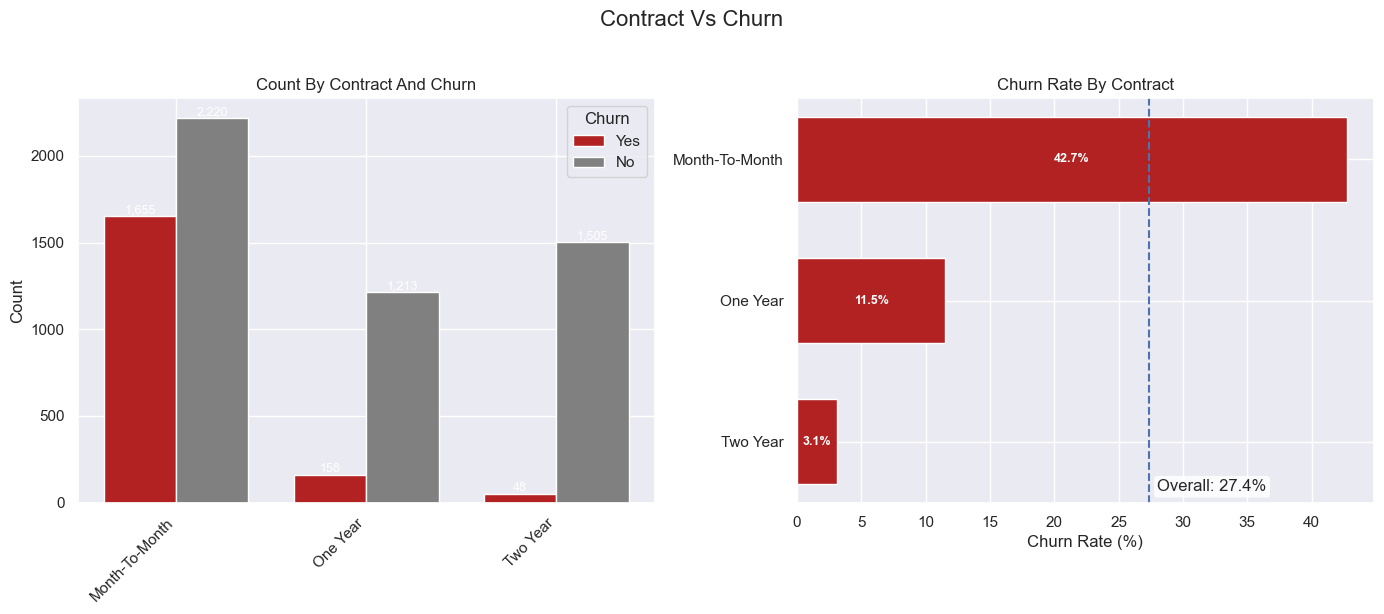

,Count Total,Count Churn,Churn Rate (%)
Contract,,,
Month-to-month,3875,1655,42.7%
One year,1371,158,11.5%
Two year,1553,48,3.1%


In [64]:
plot_stacked_bar_churn_subplot(df, 'Contract')

Pelanggan dengan **kontrak month-to-month** berjumlah **3.875** dengan **1.655 churn**, sehingga churn rate mencapai **42,7%**, jauh di atas rata-rata keseluruhan **27,4%**. Pelanggan dengan **kontrak satu tahun** berjumlah **1.371** dengan **158 churn**, churn rate **11,5%**, sedangkan pelanggan dengan **kontrak dua tahun** berjumlah **1.553** dengan hanya **48 churn**, churn rate sangat rendah yaitu **3,1%**. Perbedaan ini sangat signifikan dan menunjukkan bahwa **tipe kontrak merupakan salah satu faktor terkuat dalam memengaruhi churn**. Oleh karena itu, perusahaan sebaiknya mendorong pelanggan untuk memilih kontrak jangka panjang melalui insentif seperti diskon, bonus layanan, atau program loyalitas khusus agar pelanggan lebih terikat dan risiko churn menurun drastis.

#### 2.6.18 Bagaimanakah tingkat churn berbeda berdasarkan paperless billing ?


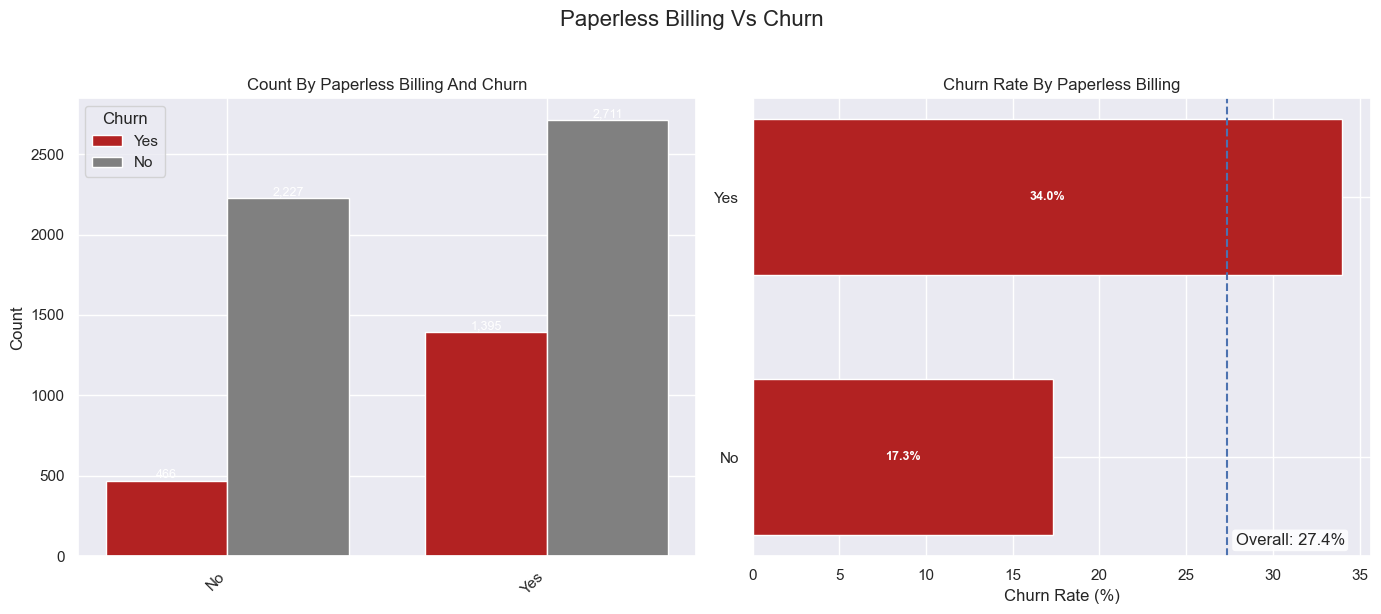

,Count Total,Count Churn,Churn Rate (%)
PaperlessBilling,,,
No,2693,466,17.3%
Yes,4106,1395,34.0%


In [65]:
plot_stacked_bar_churn_subplot(df, 'PaperlessBilling')

Pelanggan yang **menggunakan PaperlessBilling** berjumlah **4.106** dengan **1.395 churn**, sehingga churn rate mencapai **34,0%**, jauh di atas rata-rata keseluruhan **27,4%**. Sebaliknya, pelanggan yang **tidak menggunakan PaperlessBilling** berjumlah **2.693** dengan **466 churn**, churn rate jauh lebih rendah yaitu **17,3%**. Perbedaan ini cukup signifikan dan menunjukkan bahwa penggunaan PaperlessBilling justru terkait dengan churn yang lebih tinggi. Hal ini kemungkinan berhubungan dengan karakteristik pelanggan PaperlessBilling yang mayoritas menggunakan kontrak **month-to-month**, yang memang memiliki churn rate lebih tinggi. Oleh karena itu, perusahaan perlu mengombinasikan PaperlessBilling dengan **insentif kontrak jangka panjang atau paket loyalitas**, sehingga manfaat efisiensi tetap didapat tanpa meningkatkan risiko churn.


#### 2.6.19 Bagaimanakah tingkat churn berbeda berdasarkan payment method ?


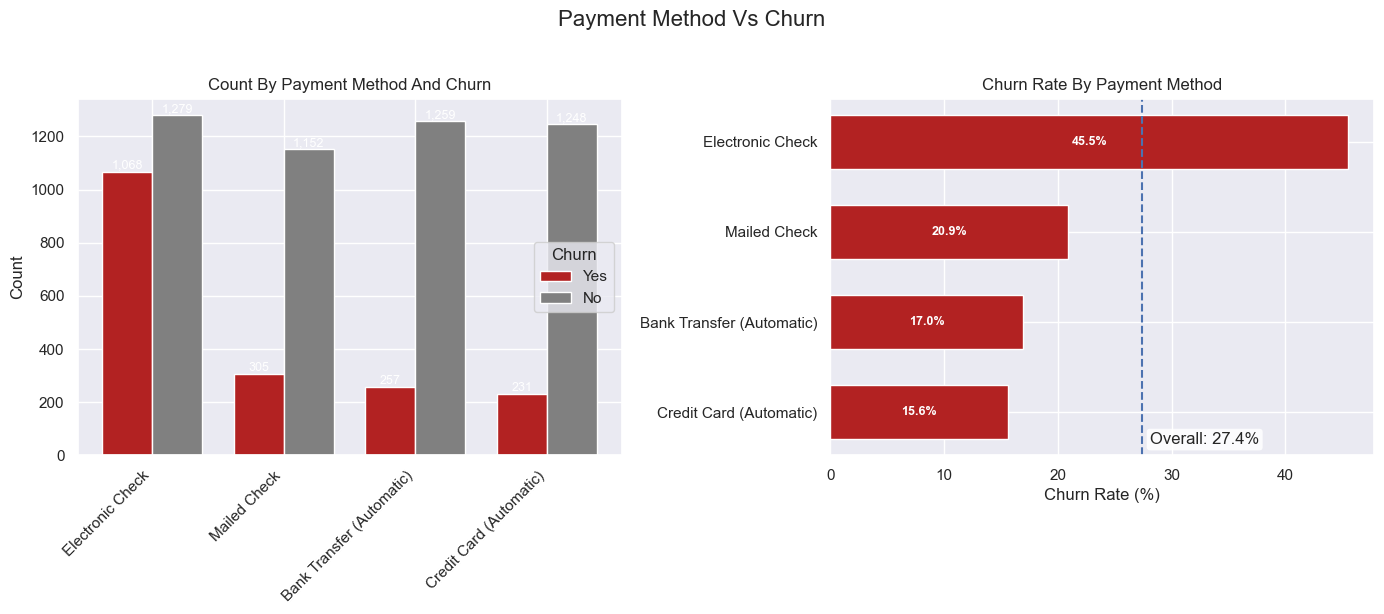

,Count Total,Count Churn,Churn Rate (%)
PaymentMethod,,,
Electronic check,2347,1068,45.5%
Mailed check,1457,305,20.9%
Bank transfer (automatic),1516,257,17.0%
Credit card (automatic),1479,231,15.6%


In [66]:
plot_stacked_bar_churn_subplot(df, 'PaymentMethod',
                               left_sort='churn_count_desc',
                               right_sort='rate_desc')


Pelanggan yang menggunakan **electronic check** berjumlah **2.347** dengan **1.068 churn**, menghasilkan churn rate sangat tinggi yaitu **45,5%**, jauh di atas rata-rata keseluruhan **27,4%**. Sebaliknya, pelanggan yang menggunakan **mailed check** berjumlah **1.457** dengan **305 churn**, churn rate **20,9%**, sementara pelanggan yang membayar melalui **bank transfer (automatic)** berjumlah **1.516** dengan **257 churn**, churn rate **17,0%**, dan pelanggan yang menggunakan **credit card (automatic)** berjumlah **1.479** dengan **231 churn**, churn rate paling rendah yaitu **15,6%**. Perbedaan ini jelas menunjukkan bahwa metode pembayaran sangat memengaruhi churn, dengan **electronic check sebagai metode paling berisiko**, sedangkan pembayaran otomatis (bank transfer atau kartu kredit) lebih stabil dan terkait dengan loyalitas pelanggan. Oleh karena itu, perusahaan perlu mendorong pelanggan untuk beralih ke metode pembayaran otomatis melalui insentif seperti diskon, cashback, atau poin reward, agar risiko churn bisa ditekan.


Tambahin correlation lagi. Entah spearman correlation atau heatmap.

### 2.7 Save Dataset

In [67]:
# Mapping Target
df['Churn'] = df['Churn'].map({1: 'Yes', 0: 'No'})

# Mapping Column SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

df.to_csv('../Data/Telco_Churn_clean_dataset.csv')